## Importing libraries and Reading dataset(s)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)  #show all columns
pd.set_option('display.max_rows', None)  #show all columns

In [4]:
df = pd.read_csv('datasets/train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#statistical summary of all the numerical variables
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

## Data Cleaning and Initial Preperation

In [8]:
#Check for duplicate values
df.duplicated().any()

False

In [9]:
#ID is a useless column, so addin to list of columns to be dropped
cols_to_drop = ['Id']

In [10]:
#checking missing values
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.shape[0]*100).round(2).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Total  Percent
PoolQC          1453    99.52
MiscFeature     1406    96.30
Alley           1369    93.77
Fence           1179    80.75
FireplaceQu      690    47.26
LotFrontage      259    17.74
GarageYrBlt       81     5.55
GarageCond        81     5.55
GarageType        81     5.55
GarageFinish      81     5.55
GarageQual        81     5.55
BsmtFinType2      38     2.60
BsmtExposure      38     2.60
BsmtQual          37     2.53
BsmtCond          37     2.53
BsmtFinType1      37     2.53
MasVnrArea         8     0.55
MasVnrType         8     0.55
Electrical         1     0.07
Id                 0     0.00
Functional         0     0.00
Fireplaces         0     0.00
KitchenQual        0     0.00
KitchenAbvGr       0     0.00
BedroomAbvGr       0     0.00
HalfBath           0     0.00
FullBath           0     0.00
BsmtHalfBath       0     0.00
TotRmsAbvGrd       0     0.00
GarageCars         0     0.00
GrLivArea          0     0.00
GarageArea         0     0.00
PavedDrive         0     0.00
WoodDeckSF         0     0.00
OpenPorchSF        0     0.00
EnclosedPorch      0     0.00
3SsnPorch          0     0.00
ScreenPorch        0     0.00
PoolArea           0     0.00
MiscVal            0     0.00
MoSold             0     0.00
YrSold             0     0.00
SaleType           0     0.00
SaleCondition      0     0.00
BsmtFullBath       0     0.00
HeatingQC          0     0.00
LowQualFinSF       0     0.00
LandSlope          0     0.00
OverallQual        0     0.00
HouseStyle         0     0.00
BldgType           0     0.00
Condition2         0     0.00
Condition1         0     0.00
Neighborhood       0     0.00
LotConfig          0     0.00
YearBuilt          0     0.00
Utilities          0     0.00
LandContour        0     0.00
LotShape           0     0.00
Street             0     0.00
LotArea            0     0.00
MSZoning           0     0.00
OverallCond        0     0.00
YearRemodAdd       0     0.00
2ndFlrSF           0     0.00
BsmtFinSF2         0     0.00
1stFlrSF           0     0.00
CentralAir         0     0.00
MSSubClass         0     0.00
Heating            0     0.00
TotalBsmtSF        0     0.00
BsmtUnfSF          0     0.00
BsmtFinSF1         0     0.00
RoofStyle          0     0.00
Foundation         0     0.00
ExterCond          0     0.00
ExterQual          0     0.00
Exterior2nd        0     0.00
Exterior1st        0     0.00
RoofMatl           0     0.00
SalePrice          0     0.00

# Comment on Null Values:
- Since the Null values are for attributes/features that do not exist in the house, we cannot drop the columns.
- At the same, for columns having minimal number of null values, we cannot perform imputation of mode, mean, etc as the columns define features that may not exist in the house, for example garage.
- The missing values define features (like garages, basements, and pools) that do not exist in houses.

## So the optimal solution is to replace the NaN values with "NA" to define them as missing or not existing in the house.

In [11]:
df.loc[:, df.isna().any()].columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

Data types of columns with missing values.

In [12]:
df.loc[:, df.isna().any()].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [13]:
#Alley: Type of alley access to property
df['Alley'].value_counts(dropna = False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

missing values in Alley indicate 'No alley access'. Replacing NaN with 'NA'

In [14]:
df['Alley'].fillna('NA', inplace = True)

In [15]:
#MasVnrType: Masonry veneer type
df['MasVnrType'].value_counts(dropna = False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

It looks like MasVnrType has values missing at random. So, imputing "mode" here.

In [16]:
m = df['MasVnrType'].mode()[0]
df['MasVnrType'].fillna(m, inplace = True)

In [17]:
#BsmtQual: Evaluates the height of the basement
df['BsmtQual'].value_counts(dropna = False)

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

Here missing values indicate No Basement. This applies to all the other basement related fields. Imputing 'NA'.

In [18]:
#basement related fields with missing values
cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

#imputing 'NA' in place of NaN for the above columns where there is no basement
df.loc[df['TotalBsmtSF'] == 0, cols] = df.loc[df['TotalBsmtSF'] == 0, cols].fillna('NA')

In [19]:
for k in cols:
    print(df[k].value_counts(dropna = False), '\n')

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64 

TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64 

No     953
Av     221
Gd     134
Mn     114
NA      37
NaN      1
Name: BsmtExposure, dtype: int64 

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64 

Unf    1256
Rec      54
LwQ      46
NA       37
BLQ      33
ALQ      19
GLQ      14
NaN       1
Name: BsmtFinType2, dtype: int64 



In [20]:
#imputing mode of respective columns for the remaining missing values

df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace = True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace = True)

In [21]:
#Electrical: Electrical system
df['Electrical'].value_counts(dropna = False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [22]:
#imputing mode in Electrical system
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace = True) 

In [23]:
#FireplaceQu: Fireplace quality
df['FireplaceQu'].value_counts(dropna = False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

missing values indicate no fireplace. Replacing NaN with 'NA'.

In [24]:
#imputing 'NA'
df['FireplaceQu'].fillna('NA', inplace = True)

In [25]:
df['GarageType'].value_counts(dropna = False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Missing values indicate no garage. Imputing 'NA'.

In [26]:
#GarageYrBlt: Year garage was built
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [27]:
df[df['GarageYrBlt'].isna()].shape

(81, 81)

<Axes: xlabel='GarageYrBlt', ylabel='Density'>

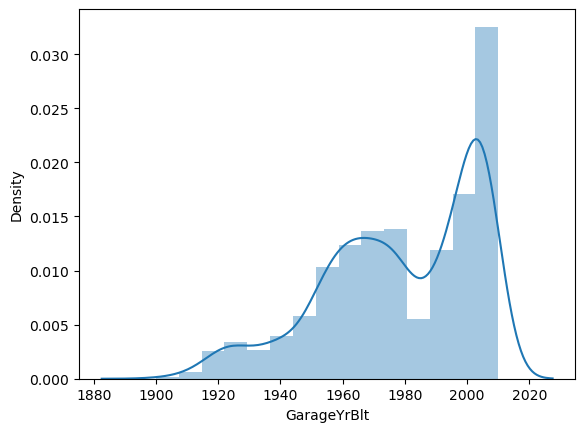

In [28]:
sns.distplot(df['GarageYrBlt'])

In [29]:
#garage related fields with missing values
cols = ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

#imputing 'NA' in place of NaN for the above columns where there is no basement
df.loc[df['GarageArea'] == 0, cols] = df.loc[df['GarageArea'] == 0, cols].fillna('NA')

In [30]:
#Treating GarageYrBlt
def garageagefunc(x):
    if x == 'NA':
        return 'NA'
    elif int(x) < 2000:
        return 'Old'
    else:
        return 'New'

#Creating a new feature which which which tells if the garage is new or old
df['GarageAge'] = df['GarageYrBlt'].apply(garageagefunc)

#having created the new variable, the old one can be dropped later.
cols_to_drop.append('GarageYrBlt')

df['GarageAge'].value_counts()

Old    977
New    402
NA      81
Name: GarageAge, dtype: int64

In [31]:
#PoolQC: Pool quality
df['PoolQC'].value_counts(dropna = False)

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

Missing values indicate no pool at the property. Imputing 'NA'. Since this columns has almost all the values belong to one category, 'NA'. Therefore, this column can be dropped.

In [32]:
cols_to_drop.append('PoolQC')
cols_to_drop

['Id', 'GarageYrBlt', 'PoolQC']

In [33]:
#Fence: Fence quality
df['Fence'].value_counts(dropna = False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

Missing values indicate no fence. Imputing 'NA'.

In [34]:
#imputing 'NA'
df['Fence'].fillna('NA', inplace = True)

In [35]:
#MiscFeature: Miscellaneous feature not covered in other categories
df['MiscFeature'].value_counts(dropna = False)

NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

NaN values indicate no other misc feature. There are almost no misc features other than shed. This variable can be converted into, shed or no shed.

In [36]:
#changing the feature to shed or no shed
df['MiscFeature'] = df['MiscFeature'].map(lambda x: 1 if x == 'Shed' else 0)

#renaming the column
df = df.rename(columns = {'MiscFeature': 'Shed'})

df['Shed'].value_counts()

0    1411
1      49
Name: Shed, dtype: int64

In [37]:
#Changing MiscVal to shedval
df.loc[df['Shed'] == 0, 'MiscVal'] = 0

#renaming the column
df = df.rename(columns = {'MiscVal': 'ShedVal'})

<Axes: >

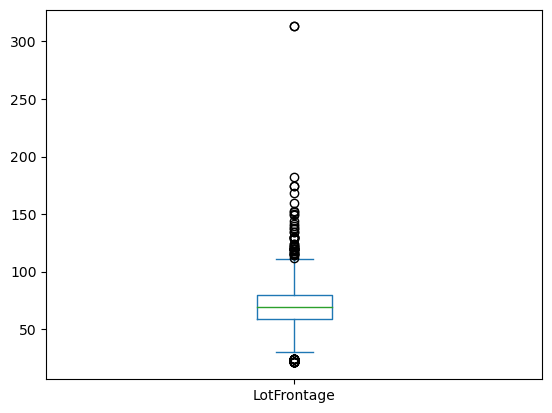

In [38]:
#LotFrontage: Linear feet of street connected to property
df['LotFrontage'].plot(kind = 'box')

In [39]:
#Imputing median in missing places in LOtFrontage
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)

<Axes: >

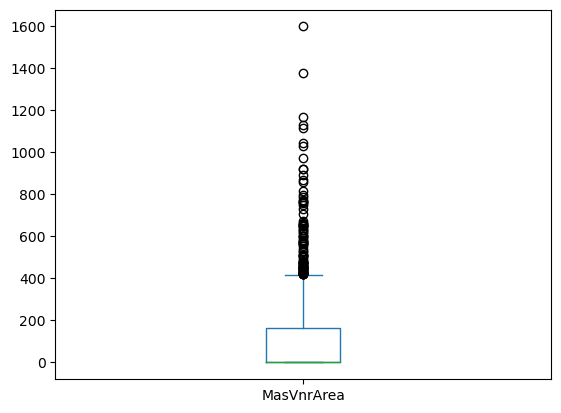

In [40]:
#MasVnrArea: Masonry veneer area in square feet
df['MasVnrArea'].plot(kind = 'box')

In [41]:
#imputing median, 0 corresponding to MaSVnrType, which is None
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace = True)

In [42]:
#dropping redundant columns
df.drop(cols_to_drop, axis = 1, inplace = True)

In [43]:
#checking for missing values again
df.isna().any().any()

False

There are no missing values in data now.

In [44]:
#creating new feature 'HouseAge'
def houseagefunc(x):
    if int(x) < 2000:
        return 'Old'
    else:
        return 'New'

#Creating a new feature which which which tells if the property is new or old
df['HouseAge'] = df['YearBuilt'].apply(houseagefunc)

df['HouseAge'].value_counts()

Old    1072
New     388
Name: HouseAge, dtype: int64

### Outlier Analysis

In [45]:
#numerical columns
num_cols = df.select_dtypes(include = np.number).columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Shed',
       'ShedVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [46]:
#statistical description of numerical columns along with some specific percentiles
df[num_cols].describe(percentiles=[0.01, 0.95, 0.99, 0.999])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
1%       20.000000    21.000000    1680.000000     3.000000     3.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   
99%     190.000000   137.410000   37567.640000    10.000000     9.000000   
99.9%   190.000000   252.871000  162062.060000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315   
std      30.202904     20.645407   180.731373   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
1%     1899.180000   1950.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
95%    2007.000000   2007.000000   456.000000  1274.000000   396.200000   
99%    2009.000000   2009.000000   791.280000  1572.410000   830.380000   
99.9%  2009.000000   2010.000000  1282.528000  2226.952000  1123.787000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
1%        0.000000     0.000000   520.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
95%    1468.000000  1753.000000  1831.250000  1141.050000      0.000000   
99%    1797.050000  2155.050000  2219.460000  1418.920000    360.000000   
99.9%  2138.312000  3203.246000  3186.690000  1847.214000    522.033000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
1%      692.180000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
95%    2466.100000      1.000000      1.000000     2.000000     1.000000   
99%    3123.480000      2.000000      1.000000     3.000000     1.000000   
99.9%  4584.200000      2.000000      1.541000     3.000000     2.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014     1.767123   
std        0.815778      0.220338      1.625393     0.644666     0.747315   
min        0.000000      0.000000      2.000000     0.000000     0.000000   
1%         1.000000      1.000000      3.000000     0.000000     0.000000   
50%        3.000000      1.000000      6.000000     1.000000     2.000000   
95%        4.000000      1.000000     10.000000     2.000000     3.000000   
99%        5.000000      2.000000     11.000000     2.000000     3

In [47]:
#Function for visualizing numerical variables, box plot
def box_plot(x):
    ax = sns.boxplot(y = df[x], color = 'darkcyan', showfliers = True, showmeans = True, 
                     meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"crimson"})
    ax.set_ylabel('')
    ax.set_title('{}'.format(x), fontsize = 14, fontweight = 'bold', pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)

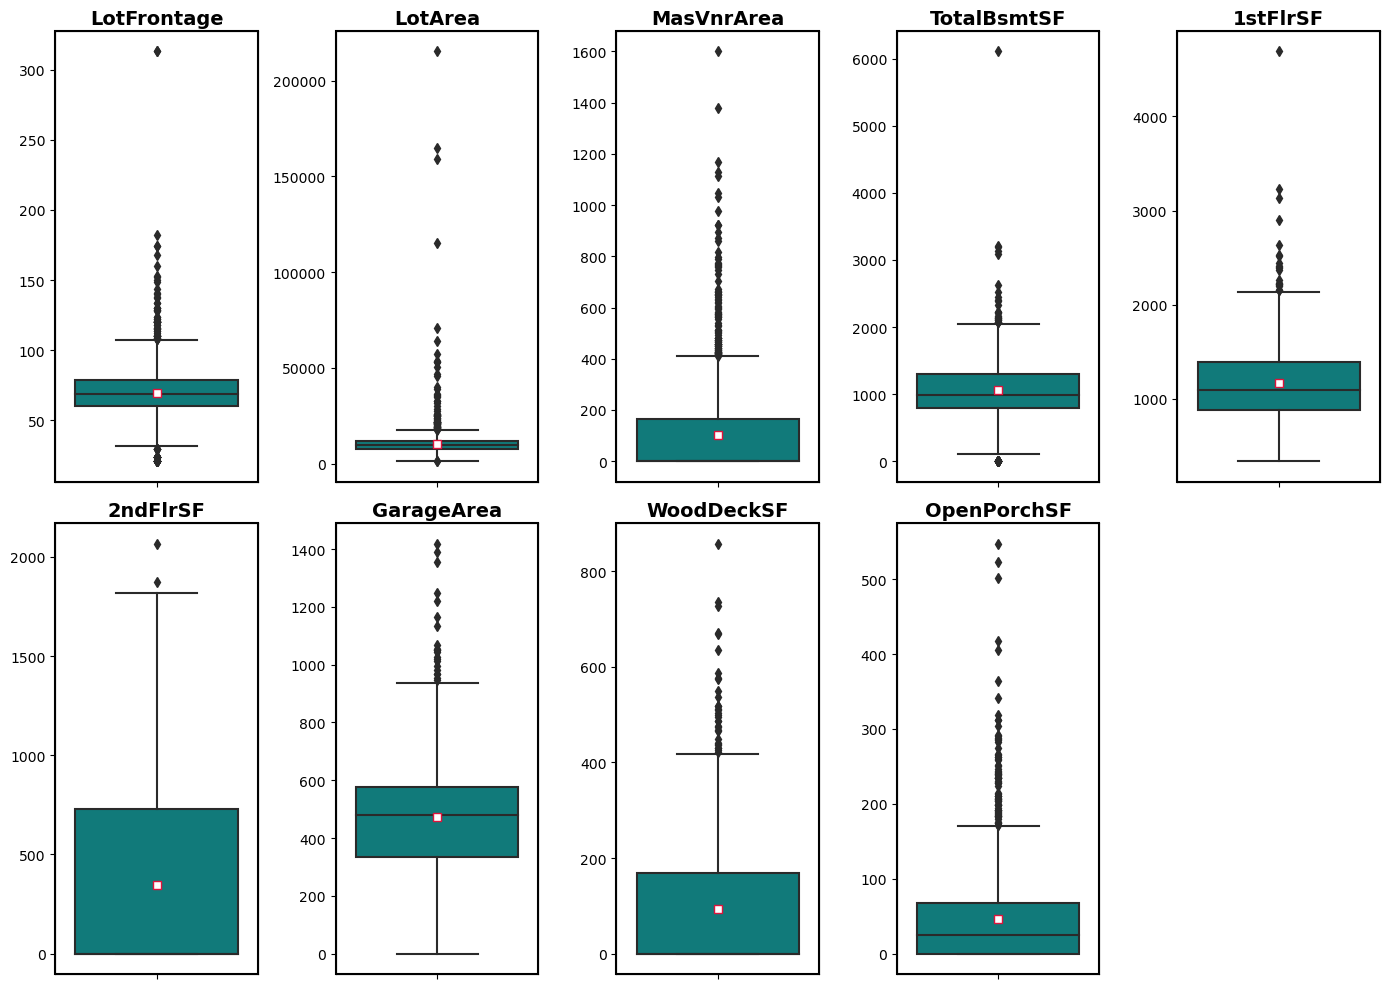

In [48]:
cols = ['LotFrontage', 'LotArea', 'MasVnrArea','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

plt.figure(figsize = [14,10])
for i in range(len(cols)):
    plt.subplot(2,5,i+1)
    box_plot(cols[i])
plt.tight_layout()

In [49]:
# Removing Outliers

#99th percentile values of important numerical variables with extreme outliers
ul_LotArea = df['LotArea'].quantile(0.99)
ul_LotFrontage = df['LotFrontage'].quantile(0.99)
ul_1stFlrSF = df['1stFlrSF'].quantile(0.99)
ul_MasVnrArea = df['MasVnrArea'].quantile(0.99)
ul_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
ul_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
ul_OpenPorchSF = df['OpenPorchSF'].quantile(0.99)

# Removing values beyond 99% for these variables
df = df[~((df["LotArea"] > ul_LotArea) | (df["LotFrontage"] > ul_LotFrontage) | (df["1stFlrSF"] > ul_1stFlrSF) | (df["MasVnrArea"] > ul_MasVnrArea) |
        (df["TotalBsmtSF"] > ul_TotalBsmtSF) | (df["WoodDeckSF"] > ul_WoodDeckSF) | (df["OpenPorchSF"] > ul_OpenPorchSF))]

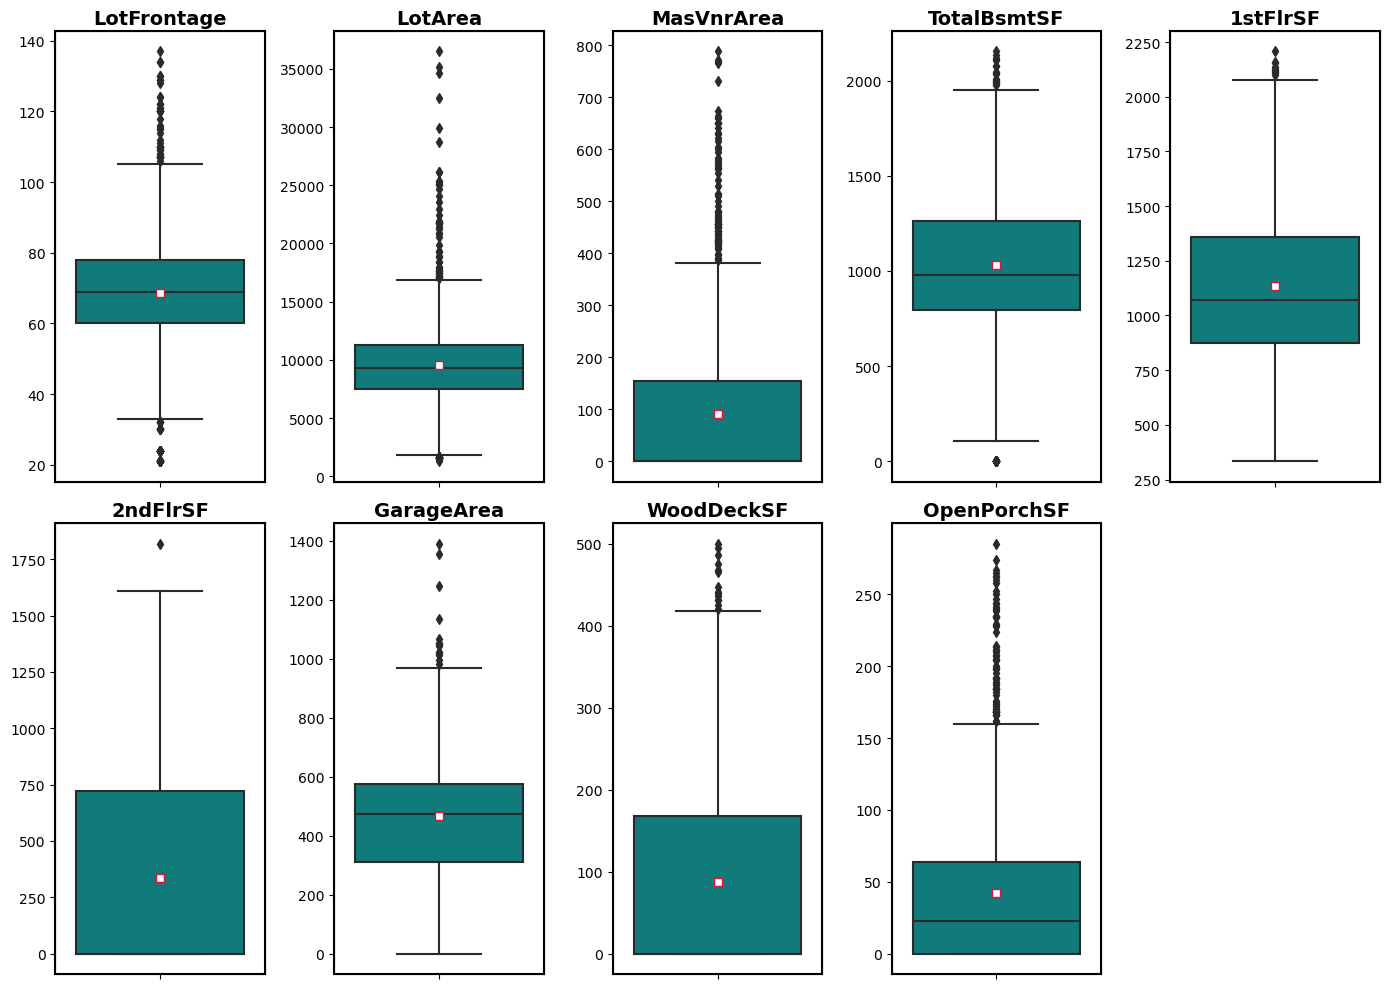

In [50]:
#visualizing same variables after outlier treatment

cols = ['LotFrontage', 'LotArea', 'MasVnrArea','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

plt.figure(figsize = [14,10])
for i in range(len(cols)):
    plt.subplot(2,5,i+1)
    box_plot(cols[i])
plt.tight_layout()

In [51]:
df.shape

(1382, 80)

#### Ordinal Encoding

Some of the variables like Quality and condition can be quantified by ordinally encoding.

In [52]:
df['ExterQual'].value_counts()

TA    872
Gd    458
Ex     38
Fa     14
Name: ExterQual, dtype: int64

In [53]:
#ordinally encoding these variables

df['ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df['ExterCond'] = df['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})

df['BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df['BsmtCond'] = df['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})

df['HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df['KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df['FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})

- 5 = Ex = Excellent
- 4 = Gd = Good
- 3 = TA = Average/Typical
- 2 = Fa = Fair
- 1 = Po = Poor

Variables '**OverallQual**' and '**OverallCond**' are already ordinally enocoded. So, will keep it that way.

## Exploratory Data Analysis

In [54]:
from scipy.stats import norm

Text(0.5, 0, '')

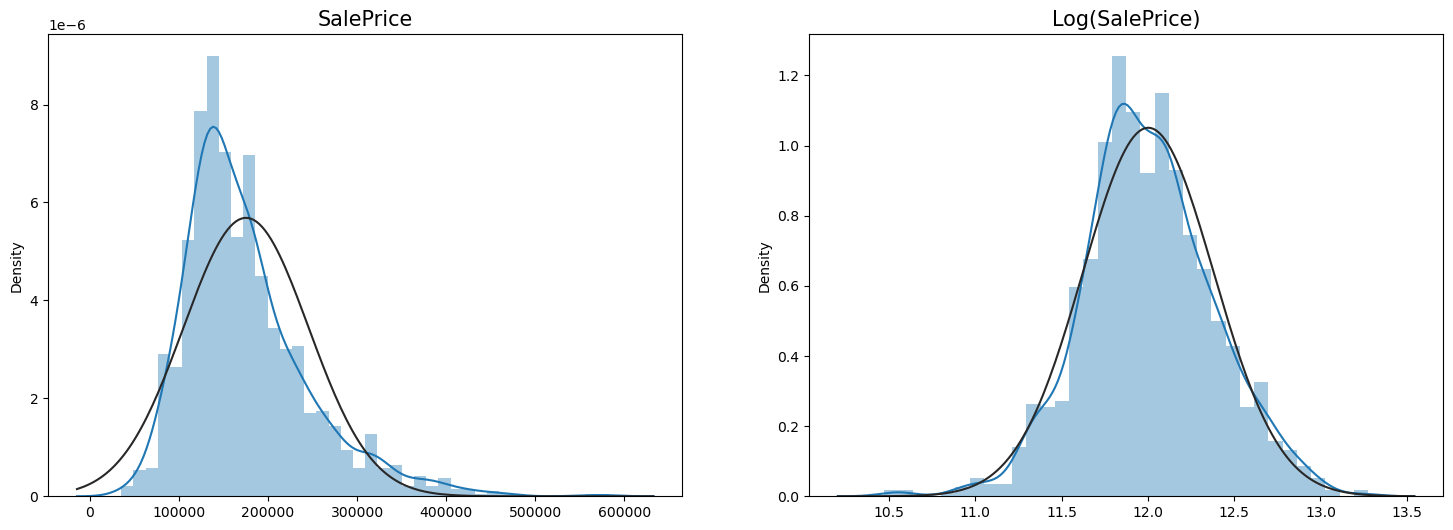

In [55]:
#visualizing Target

plt.figure(figsize = [18, 6])
plt.subplot(1,2,1)
sns.distplot(df['SalePrice'], fit = norm)
plt.title('SalePrice', fontsize = 15)
plt.xlabel('')

#visualizing log(Target)

plt.subplot(1,2,2)
sns.distplot(np.log(df['SalePrice']), fit = norm)
plt.title('Log(SalePrice)', fontsize = 15)
plt.xlabel('')

The target variable, 'SalePrice' is slightly positively skewed.

In [56]:
#visualizing catagorical variables with repect to target

def box_plot2(x, y):
    ax = sns.boxplot(x = df[x], y = df[y], palette = 'Set2', showmeans = True,
                meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"crimson"})
    ax.set_ylabel('')
    ax.set_title('{}'.format(x), fontsize = 14, fontweight = 'bold', pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)
    plt.title('{}'.format(x), fontsize = 16)

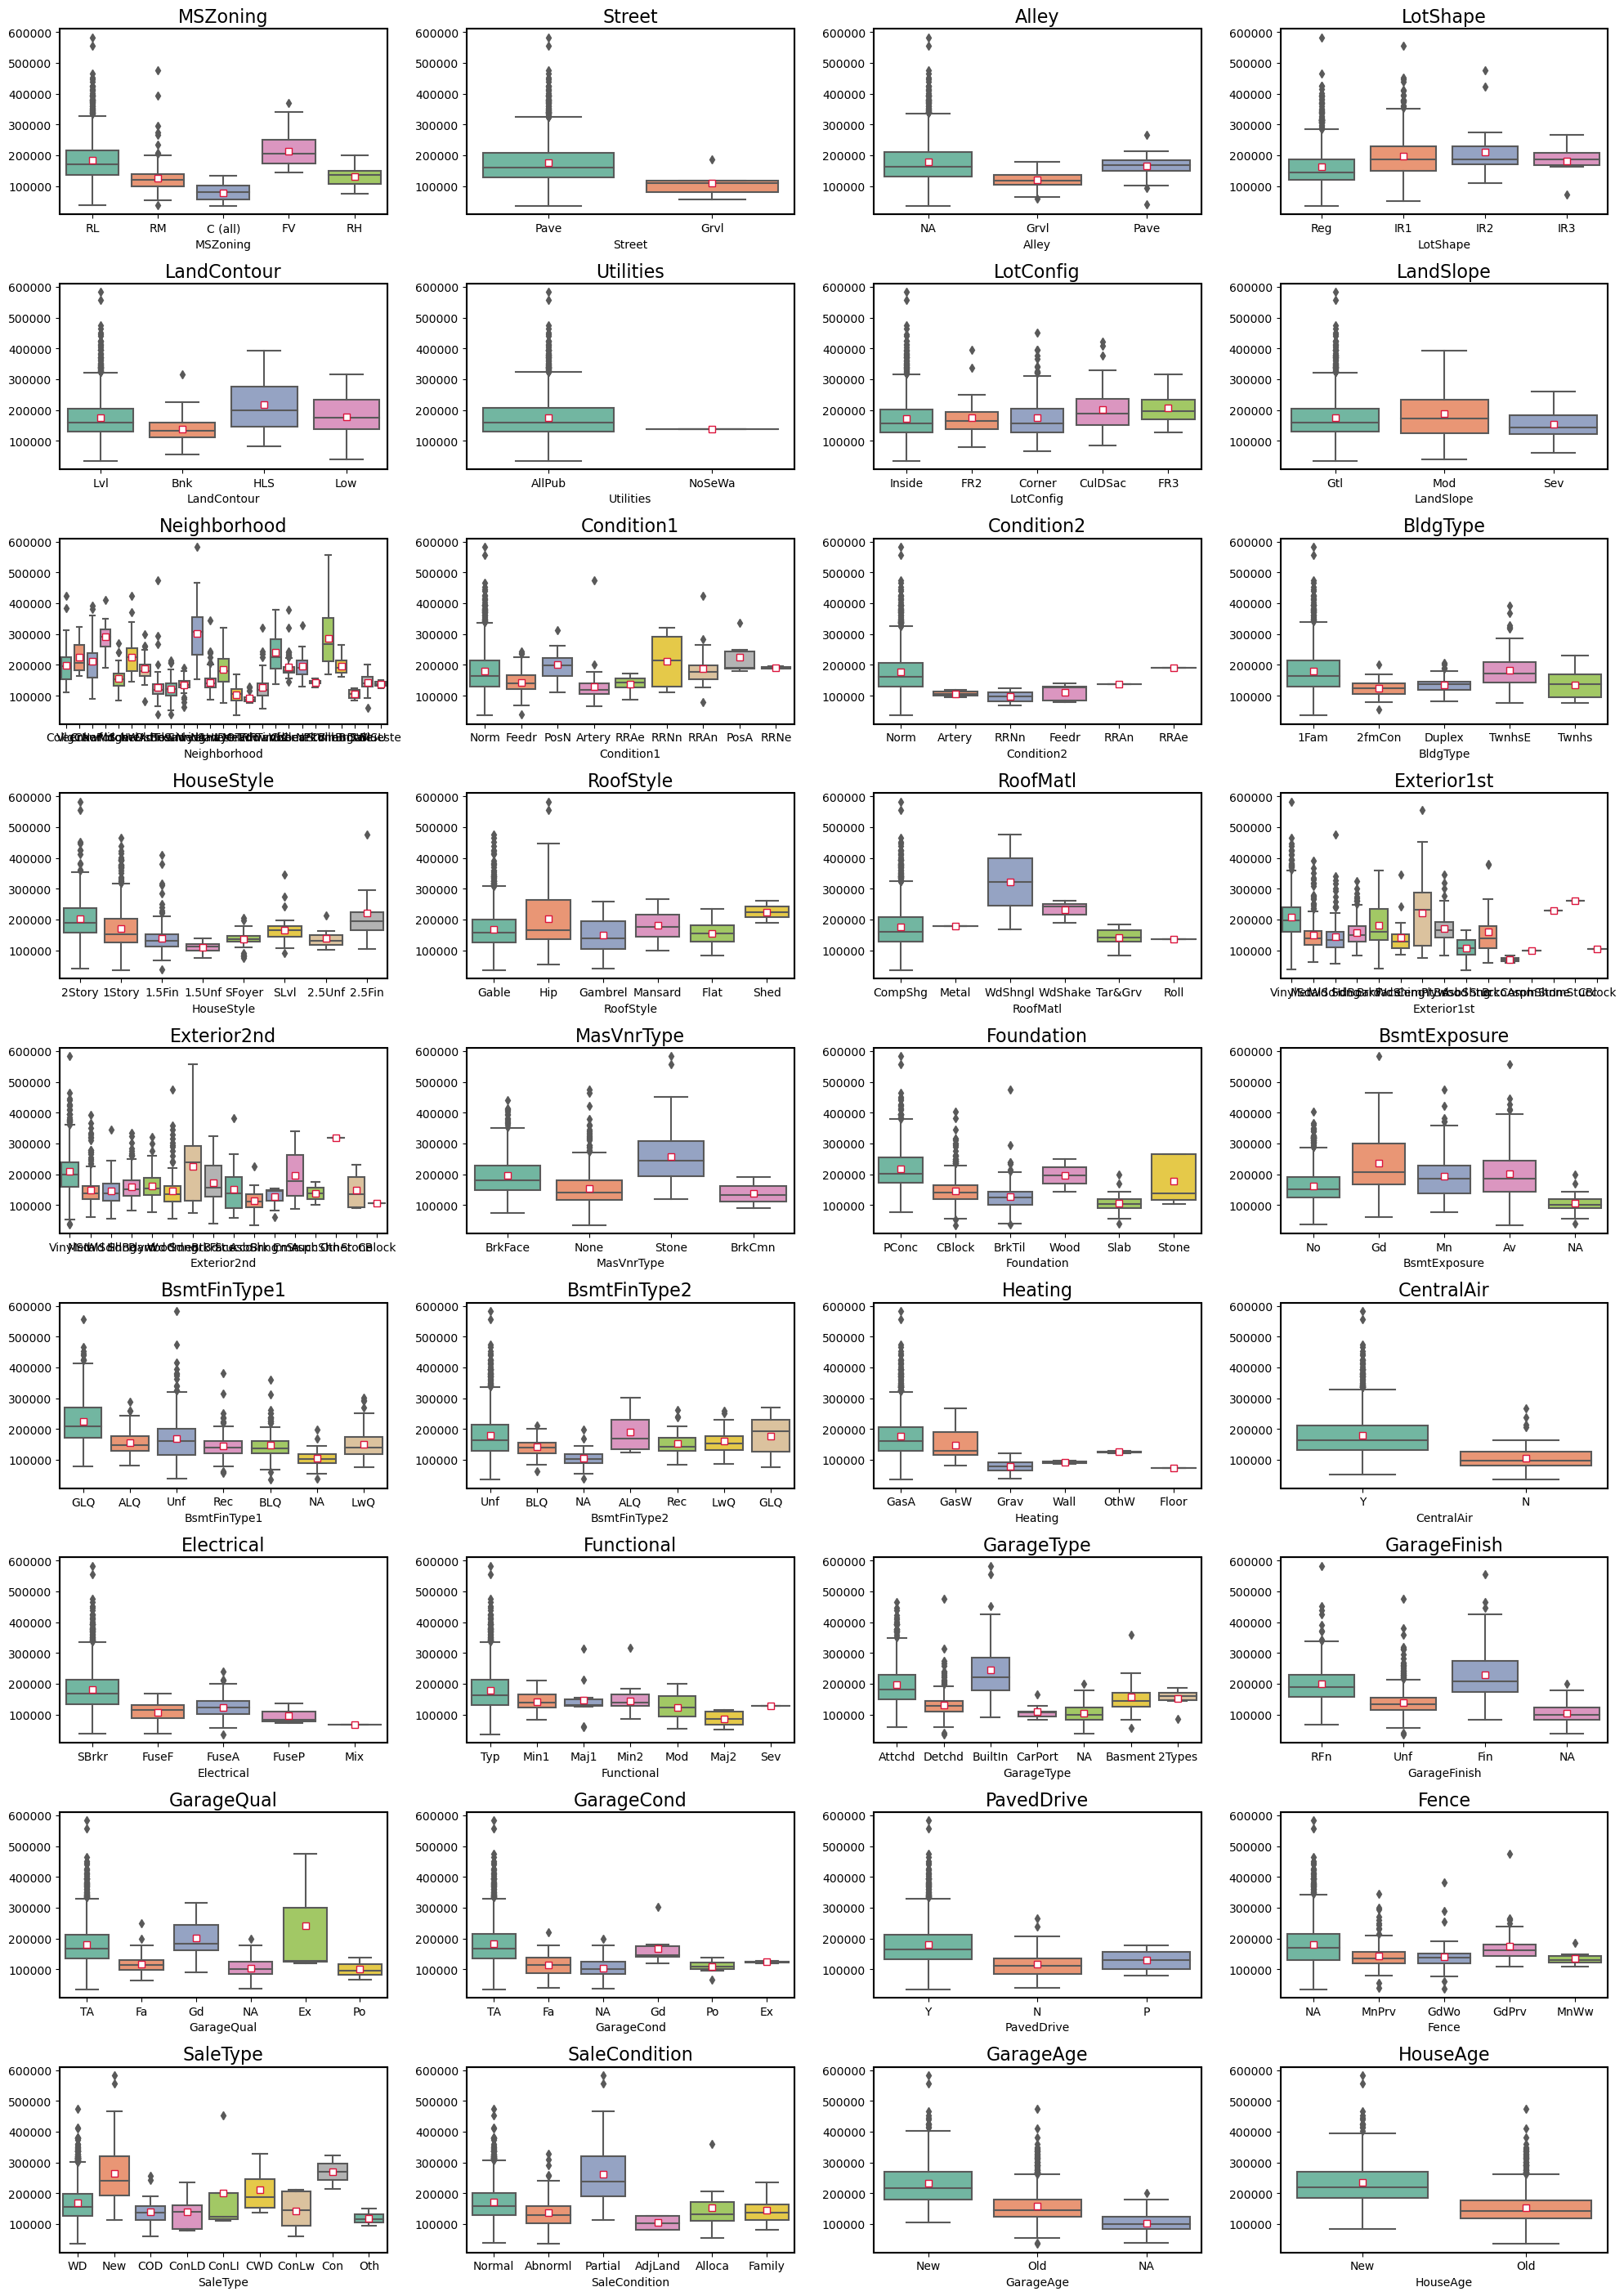

In [122]:
cat_cols = df.select_dtypes(exclude = np.number).columns

plt.figure(figsize = [20,34])
for i in range(len(cat_cols)):
    plt.subplot(11,4, i+1)
    box_plot2(cat_cols[i], 'SalePrice')

plt.tight_layout() 
plt.show()

It is quite clear that some of these variables have significant difference in saleprices of their categories, while others do not. The ones that do not are not important. This can be taken care of in feature selection.

In [ ]:
#visualizing numerical varibles against SalePrice using scatter plot

#Function for visualizing numerical variables against SalePrice, scatterplot
def scatter_plot(x):
    ax = sns.scatterplot(x = df[x], y = df['SalePrice'], alpha = 0.35, linewidth = 0)
    ax.set_title('{} vs SalePrice'.format(x), fontsize = 12, pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)

In [63]:
num_cols = [col for col in df.select_dtypes(include = np.number).columns if col != 'SalePrice']

plt.figure(figsize = [18,32])
for i in range(len(num_cols)):
    plt.subplot(11,4, i+1)
    scatter_plot(num_cols[i])
plt.tight_layout()
plt.show()

Some of the binary and ordinal catagorical variables have also been visualised here.

A clear increasing trend can be seen in many variables with SalePrice, almost linear in some cases.

Newer houses tend to be more expensive. Houses with newly built garages are more expensive than houses with old garages, which are more expensive than houses with no garage.

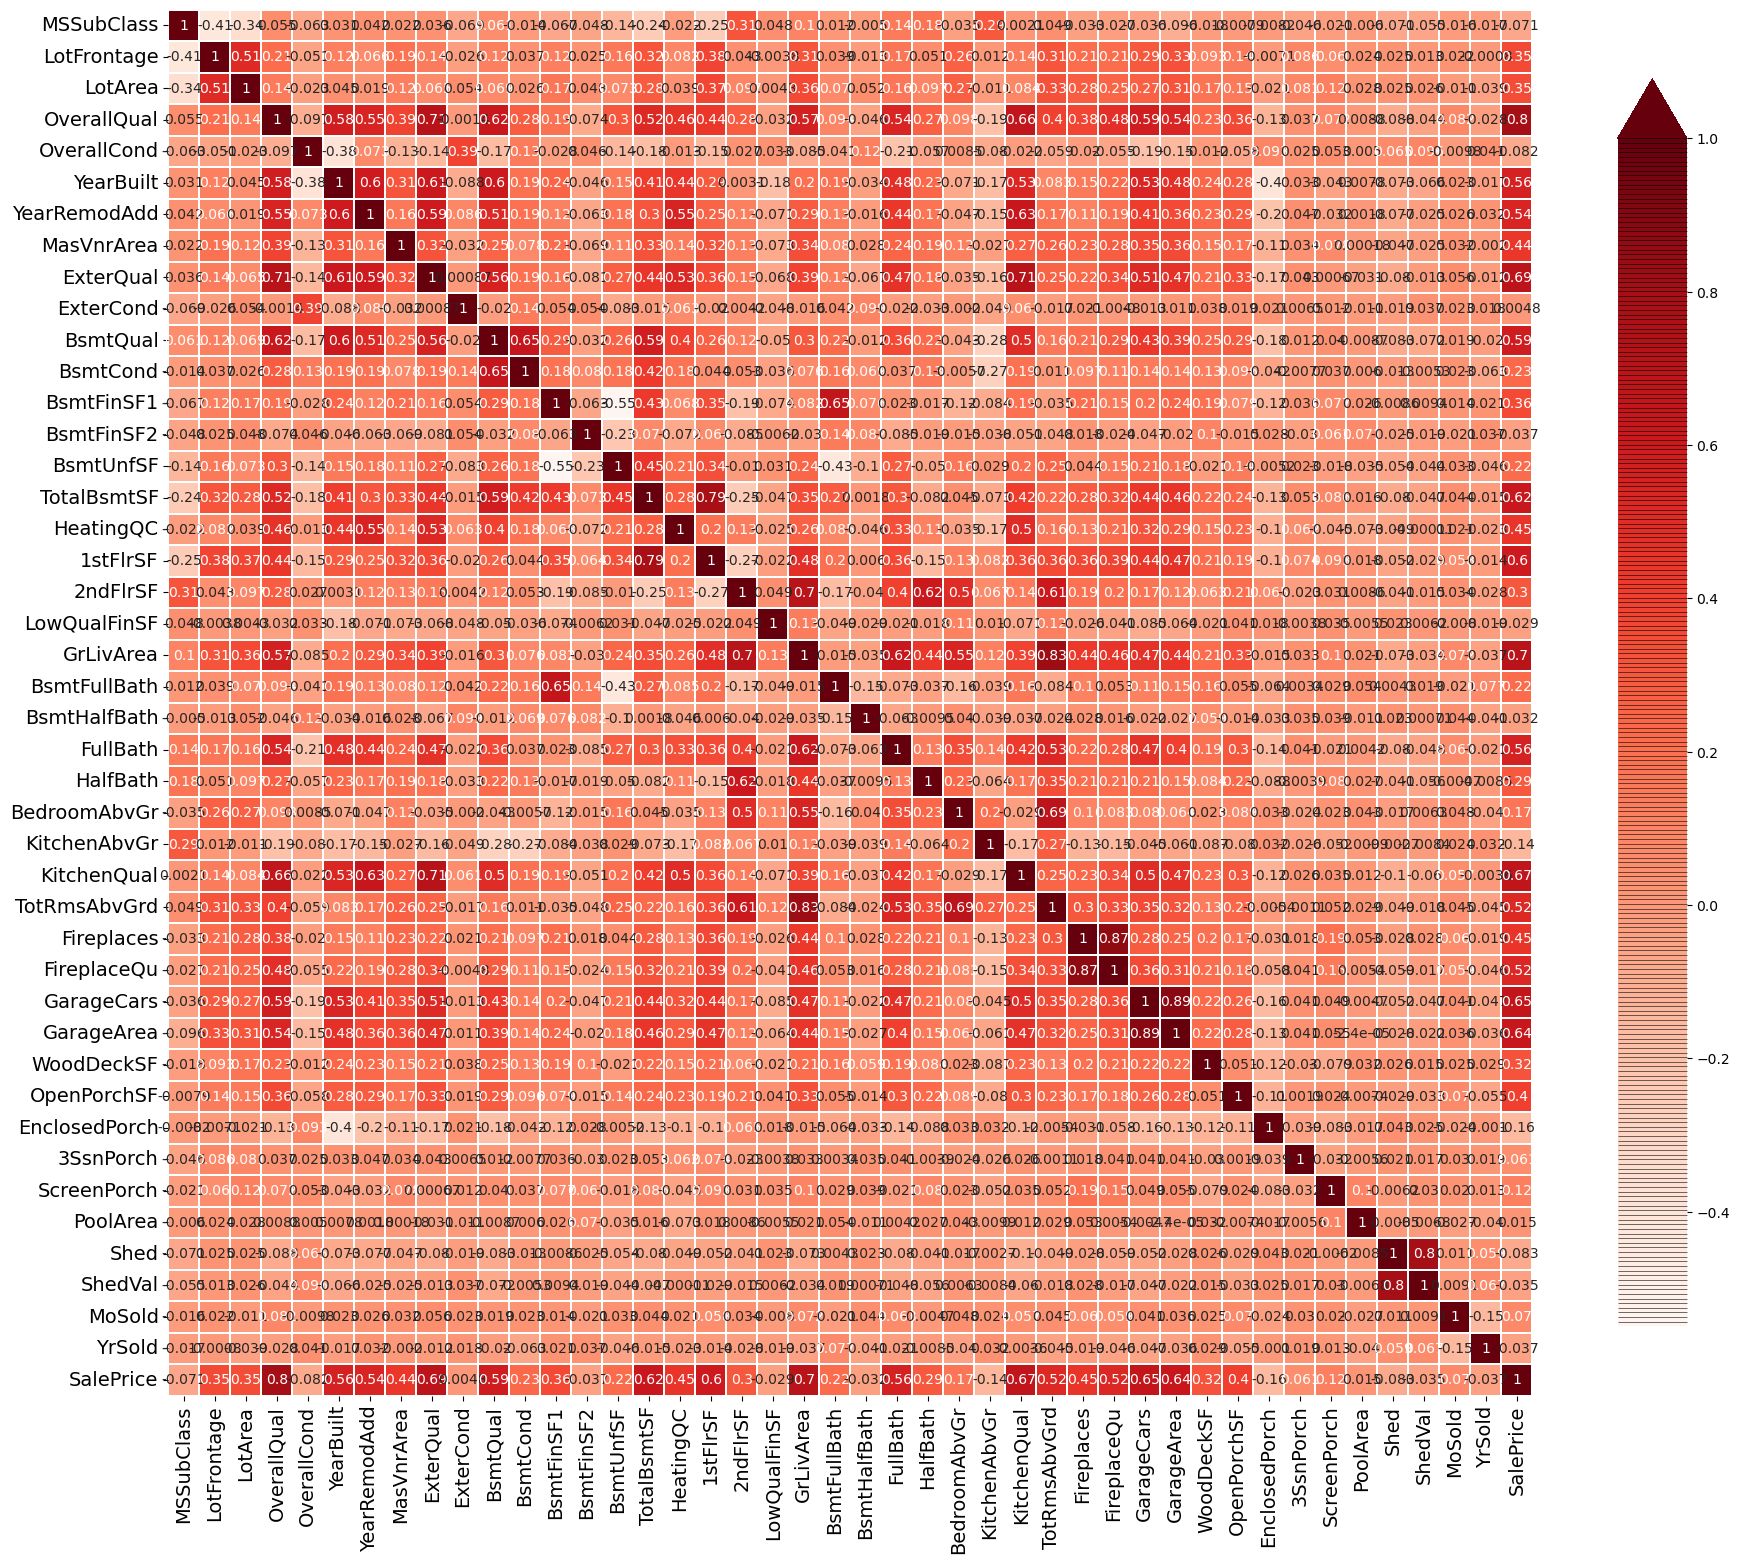

In [64]:
# visualizing correlation between numerical variables

plt.figure(figsize = [22,18])
cbar_kws={'orientation':'vertical', 'shrink':0.9,'extend':'max',
          'extendfrac':0.05, 'drawedges':True, 'pad':0.05, 'aspect':18}
sns.heatmap(df.corr(), annot = True, cmap = 'Reds', linecolor = 'w', linewidth = 0.2, cbar_kws = cbar_kws)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

There are variables with high correlation. This can be taken care in feature selection.

### taking a look at YearRemodAdd

In [65]:
#fuction to check if the house was remodelled
def Remodelfunc(x):
    if x['YearRemodAdd'] == x['YearBuilt']:
        return 0   #no remodeling or additions
    else:
        return 1   #remodelled

df['RemodelYN'] = df.apply(Remodelfunc, axis = 1)
df['RemodelYN'].value_counts()

0    728
1    654
Name: RemodelYN, dtype: int64

<Axes: xlabel='RemodelYN', ylabel='SalePrice'>

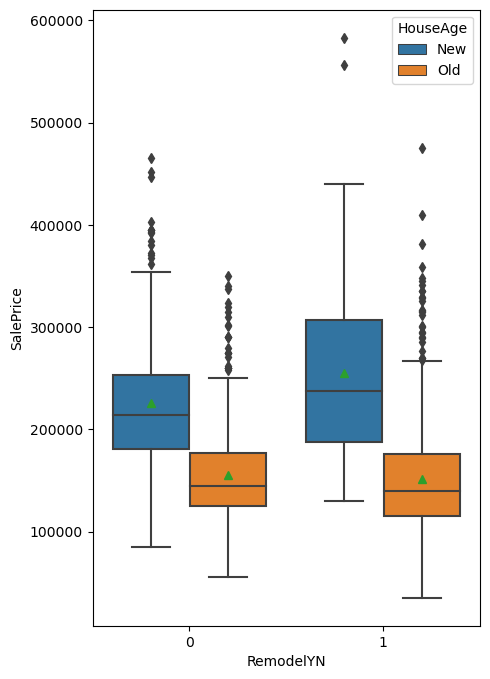

In [66]:
plt.figure(figsize = [5, 8])
sns.boxplot(x = df['RemodelYN'], y = df['SalePrice'], hue = df['HouseAge'], showmeans = True, showfliers = True)

<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

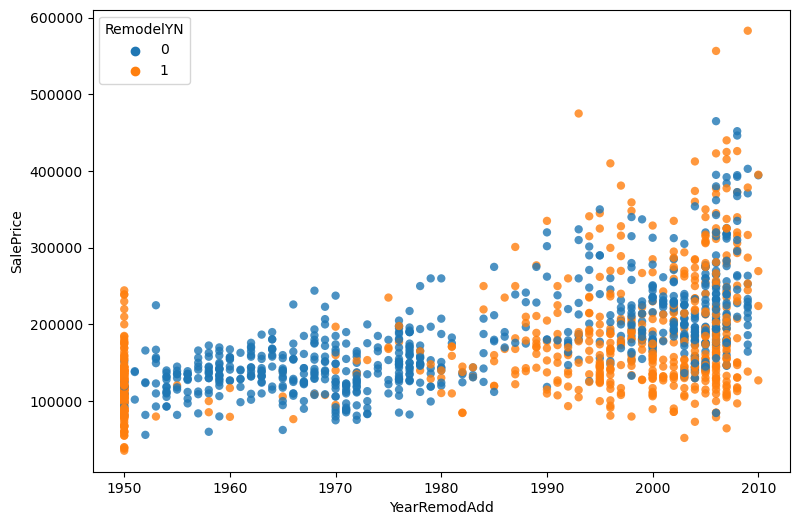

In [67]:
plt.figure(figsize = [9, 6])
sns.scatterplot(x = df['YearRemodAdd'], y = df['SalePrice'], hue = df['RemodelYN'], alpha = 0.8, linewidth = 0)

Text(0.5, 0, 'Age of Property when Sold')

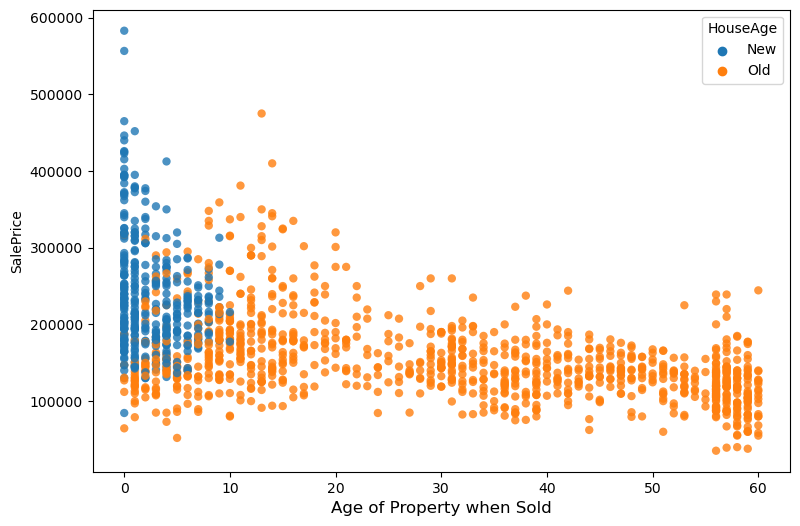

In [68]:
plt.figure(figsize = [9, 6])
sns.scatterplot((df['YrSold'] - df['YearRemodAdd']), df['SalePrice'], hue = df['HouseAge'], alpha = 0.8, linewidth = 0)
plt.xlabel('Age of Property when Sold', fontsize = 12)

There appears to be a negetive correlation between age of the house from the year of building or remodelling of house to the year of selling and the the price at which the property was sold. We need not create this as a new feature as linear regression will take care of this.

## Data Preperation

In [69]:
#making a copy of df

dfm = df.copy()
dfm.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave    NA      Reg   
1          20       RL         80.0     9600   Pave    NA      Reg   
2          60       RL         68.0    11250   Pave    NA      IR1   
3          70       RL         60.0     9550   Pave    NA      IR1   
4          60       RL         84.0    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0       196.0          4          3      PConc         4         3   
1         0.0          3          3     CBlock         4         3   
2       162.0          4          3      PConc         4         3   
3         0.0          3          3     BrkTil         3         4   
4       350.0          4          3      PConc         4         3   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA          5          Y      SBrkr       856       854   
1         1262    GasA          5          Y      SBrkr      1262         0   
2          920    GasA          5          Y      SBrkr       920       866   
3          756    GasA          4          Y      SBrkr       961       756   
4         1145    GasA          5          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  \
0             3             1            4             8        Typ   
1             3             1            3             6        Typ   
2             3             1            4             6        Typ   
3             3             1            4             7        Typ   
4             4             1            4             9        Typ   

   Firepla

In [70]:
#binary catagorical features

bin_cols = [col for col in dfm.columns if dfm[col].nunique() == 2]
bin_cols

['Street', 'Utilities', 'CentralAir', 'Shed', 'HouseAge', 'RemodelYN']

'Street', 'Utilities' have almost all the values belonging to one category, therefore these columns are not useful for modeling.
These can be removed later in feature selection using RFE or RFECV.

In [71]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the binary mapping to binary columns
dfm['Street'] = dfm['Street'].map({'Pave': 1, "Grvl": 0})
dfm['Utilities'] = dfm['Utilities'].map({'AllPub': 1, "NoSeWa": 0})
dfm['HouseAge'] = dfm['HouseAge'].map({'New': 1, "Old": 0})
dfm['CentralAir'] = dfm['CentralAir'].map({'Y': 1, "N": 0})

In [72]:
dfm['MSSubClass'] = dfm['MSSubClass'].astype('object')

In [73]:
#other catagorical columns

cat_cols = dfm.select_dtypes(include = ['object', 'category']).columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'Fence', 'SaleType', 'SaleCondition', 'GarageAge'],
      dtype='object')

In [74]:
# Creating dummy variables for the remaining categorical variables and dropping one level

dummy_df = pd.get_dummies(dfm[cat_cols], drop_first=True)
dummy_df.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_NA  Alley_Pave  \
0            0            0            1            0         1           0   
1            0            0            1            0         1           0   
2            0            0            1            0         1           0   
3            0            0            1            0         1           0   
4            0            0            1            0         1           0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0   
4         

In [75]:
#concatenating the dummy variables with main df
dfm = pd.concat([dfm, dummy_df], axis = 1)

In [76]:
#dropping the original catagorical variables as dummies have already been created
dfm = dfm.drop(cat_cols, axis = 1)

### Train - Test Split

In [77]:
# split into train and test
from sklearn.model_selection import train_test_split
dfm_train, dfm_test = train_test_split(dfm, train_size=0.7, test_size = 0.3, random_state=42)

In [78]:
dfm_train.shape, dfm_test.shape

((967, 246), (415, 246))

In [79]:
dfm_train.head()

LotFrontage  LotArea  Street  Utilities  OverallQual  OverallCond  \
510          75.0    14559       1          1            5            7   
61           60.0     7200       1          1            5            7   
427          77.0     8593       1          1            4            6   
490          69.0     2665       1          1            5            6   
1378         21.0     1953       1          1            6            5   

      YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  \
510        1951          2000        70.0          4          3         3   
61         1920          1996         0.0          3          3         3   
427        1957          1957         0.0          3          3         3   
490        1976          1976         0.0          3          3         4   
1378       1973          1973       408.0          3          3         3   

      BsmtCond  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
510          3         650         180        178         1008          5   
61           2           0           0        530          530          3   
427          3         288           0        619          907          5   
490          3           0           0        264          264          3   
1378         2         309           0        174          483          3   

      CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
510            1      1363         0             0       1363             1   
61             0       581       530             0       1111             0   
427            1       907         0             0        907             0   
490            1       616       688             0       1304             0   
1378           1       483       504             0        987             0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
510              0         1         0             2             1   
61               0         1         0             3             1   
427              0         1         0             3             1   
490              0         1         1             3             1   
1378             0         1         1             2             1   

      KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageCars  \
510             3             6           2            3           1   
61              2             6           0            0           1   
427             3             5           0            0           1   
490             3             4           1            4           1   
1378            3             5           0            0           1   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
510          288         324           42              0          0   
61           288           0            0            144          0   
427          352           0            0              0          0   
490          336         141           24              0          0   
1378         264          72            0              0          0   

      ScreenPorch  PoolArea  Shed  ShedVal  MoSold  YrSold  SalePrice  \
510           168         0     1     2000       6    2009     164900   
61              0         0     0        0       3    2007     101000   
427             0         0     0        0       7    2008     109008   
490             0         0     0        0       6    2008     115000   
1378            0         0     0        0       6    2006      83000   

      HouseAge  RemodelYN  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
510          0          1              0              0              0   
61           0          1              0              0              0   
427          0          0              0              0              0   
490          0          0              0              0              0   
1378         0          0              0              0         

In [80]:
dfm_test.head()

LotFrontage  LotArea  Street  Utilities  OverallQual  OverallCond  \
326         32.0    10846       1          1            8            5   
781         65.0     7153       1          1            6            5   
280         82.0    11287       1          1            7            6   
870         60.0     6600       1          1            5            5   
822         69.0    12394       1          1            7            5   

     YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  \
326       1993          1993         0.0          4          3         4   
781       1992          1992         0.0          4          4         4   
280       1989          1989       340.0          4          3         4   
870       1962          1962         0.0          3          3         3   
822       2003          2003         0.0          4          3         4   

     BsmtCond  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
326         3        1619           0        100         1719          5   
781         3         387           0        374          761          5   
280         3         421           0        386          807          4   
870         3           0           0        894          894          4   
822         3           0           0        847          847          5   

     CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
326           1      1719         0             0       1719             2   
781           1       810       793             0       1603             0   
280           1      1175       807             0       1982             0   
870           0       894         0             0        894             0   
822           1       847       886             0       1733             0   

     BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
326             0         1         1             1             1   
781             0         2         1             3             1   
280             0         2         1             3             1   
870             0         1         0             2             1   
822             0         2         1             3             1   

     KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageCars  \
326            4             6           2            4           2   
781            4             7           0            0           2   
280            4             7           1            3           2   
870            3             5           0            0           1   
822            4             7           1            4           2   

     GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
326         473         122           30              0          0   
781         484           0          124              0          0   
280         575           0           84              0        196   
870         308           0            0              0          0   
822         433         100           48              0          0   

     ScreenPorch  PoolArea  Shed  ShedVal  MoSold  YrSold  SalePrice  \
326            0         0     0        0       5    2008     324000   
781            0         0     0        0       7    2006     175900   
280            0         0     0        0       1    2007     228500   
870            0         0     0        0       8    2009     109500   
822            0         0     0        0      10    2007     225000   

     HouseAge  RemodelYN  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
326         0          0              0              0              0   
781         0          0              0              0              0   
280         0          0              0              0              0   
870         0          0              0              0              0   
822         1          0              0              0              0   

     MSSubClass_50  MSSubClass_60  MSSubCl

### Feature Scaling

In [81]:
#numrical features

num_cols = [col for col in dfm.select_dtypes(include = np.number).columns if (col != 'SalePrice') & (col not in cat_cols) & (col not in bin_cols) & (col not in dummy_df.columns)]
num_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'ShedVal',
 'MoSold',
 'YrSold']

In [82]:
#using standard scaler to standardise the numerical features

scaler = StandardScaler()
dfm_train[num_cols] = scaler.fit_transform(dfm_train[num_cols])
dfm_test[num_cols] = scaler.transform(dfm_test[num_cols])

## Model Building

In [83]:
#seperating features from target

X_train = dfm_train.drop('SalePrice', axis = 1)
y_train = dfm_train['SalePrice']
X_test = dfm_test.drop('SalePrice', axis = 1)
y_test = dfm_test['SalePrice']

In [84]:
#function for building linear regression model using statsmodel api
def build_model(cols):
    # Add a constant
    X_train_lm = sm.add_constant(X_train[cols])
    # fitting model to data
    lr = sm.OLS(y_train, X_train_lm).fit()
    return lr

In [85]:
lr = build_model(X_train.columns)

X_train_lm = sm.add_constant(X_train, has_constant='add')
y_train_pred = lr.predict(X_train_lm)
print('Train R2 score      : ', r2_score(y_train, y_train_pred).round(2))

X_test_lm = sm.add_constant(X_test, has_constant='add')
y_pred = lr.predict(X_test_lm)
print('Test R2 score       : ', r2_score(y_test, y_pred).round(2))

Train R2 score      :  0.94
Test R2 score       :  0.86


There is a visible difference between scores on training ans test sets. This is a symptom of overfitting and can be rectified using intelligent feature selection and regularization.

<Axes: ylabel='Density'>

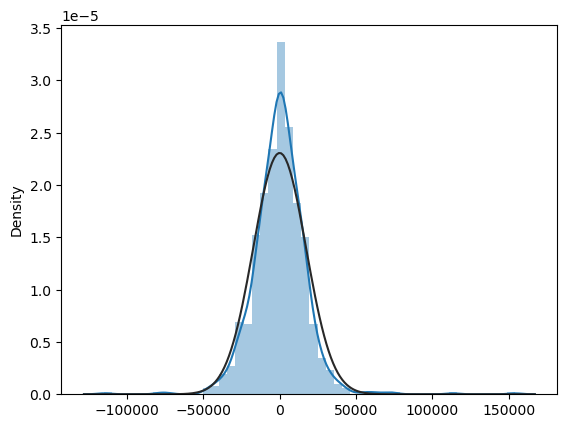

In [86]:
sns.distplot(y_train - y_train_pred, fit = norm)

Error Terms seen to be more or less normally distributed.

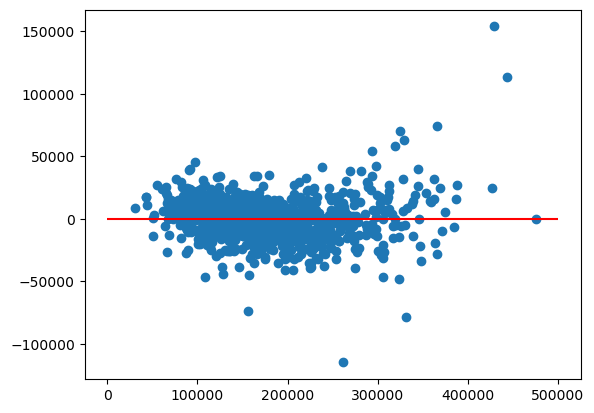

In [87]:
plt.scatter(y_train_pred, (y_train - y_train_pred))
plt.hlines(y = 0, xmin = 0, xmax = 500000, color = 'r')

There seems to be some non-linearity in the error terms. It violates the assumption of linear regression that the error terms should be independent. This can be rectified by transforming regressor variables or target.

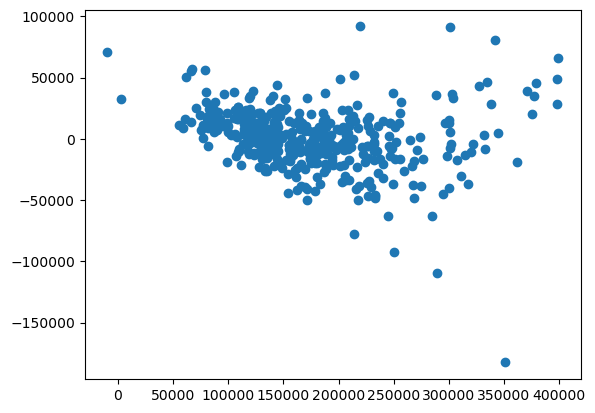

In [88]:
plt.scatter(y_pred, (y_test - y_pred))

### Transforming Target variable (Log transoformation)

In [89]:
#Logarithmic transformation of reponse

y_train_log = np.log(dfm_train['SalePrice'])
y_test_log = np.log(dfm_test['SalePrice'])

After transformation the regression eqaution becomes,

**log(y) = Xβ + ϵ**

In [90]:
#function for building linear regression model with transformed response using statsmodel api
def build_model(cols):
    # Add a constant
    X_train_lm = sm.add_constant(X_train[cols])
    # fitting model to data
    lr = sm.OLS(y_train_log, X_train_lm).fit()
    return lr

In [91]:
lr = build_model(X_train.columns)

X_train_lm = sm.add_constant(X_train, has_constant='add')
y_train_pred_log = lr.predict(X_train_lm)
print('Train R2 score      : ', r2_score(y_train_log, y_train_pred_log).round(2))

X_test_lm = sm.add_constant(X_test, has_constant='add')
y_pred_log = lr.predict(X_test_lm)
print('Test R2 score       : ', r2_score(y_test_log, y_pred_log).round(2))

Train R2 score      :  0.95
Test R2 score       :  0.86


Text(0, 0.5, 'Error')

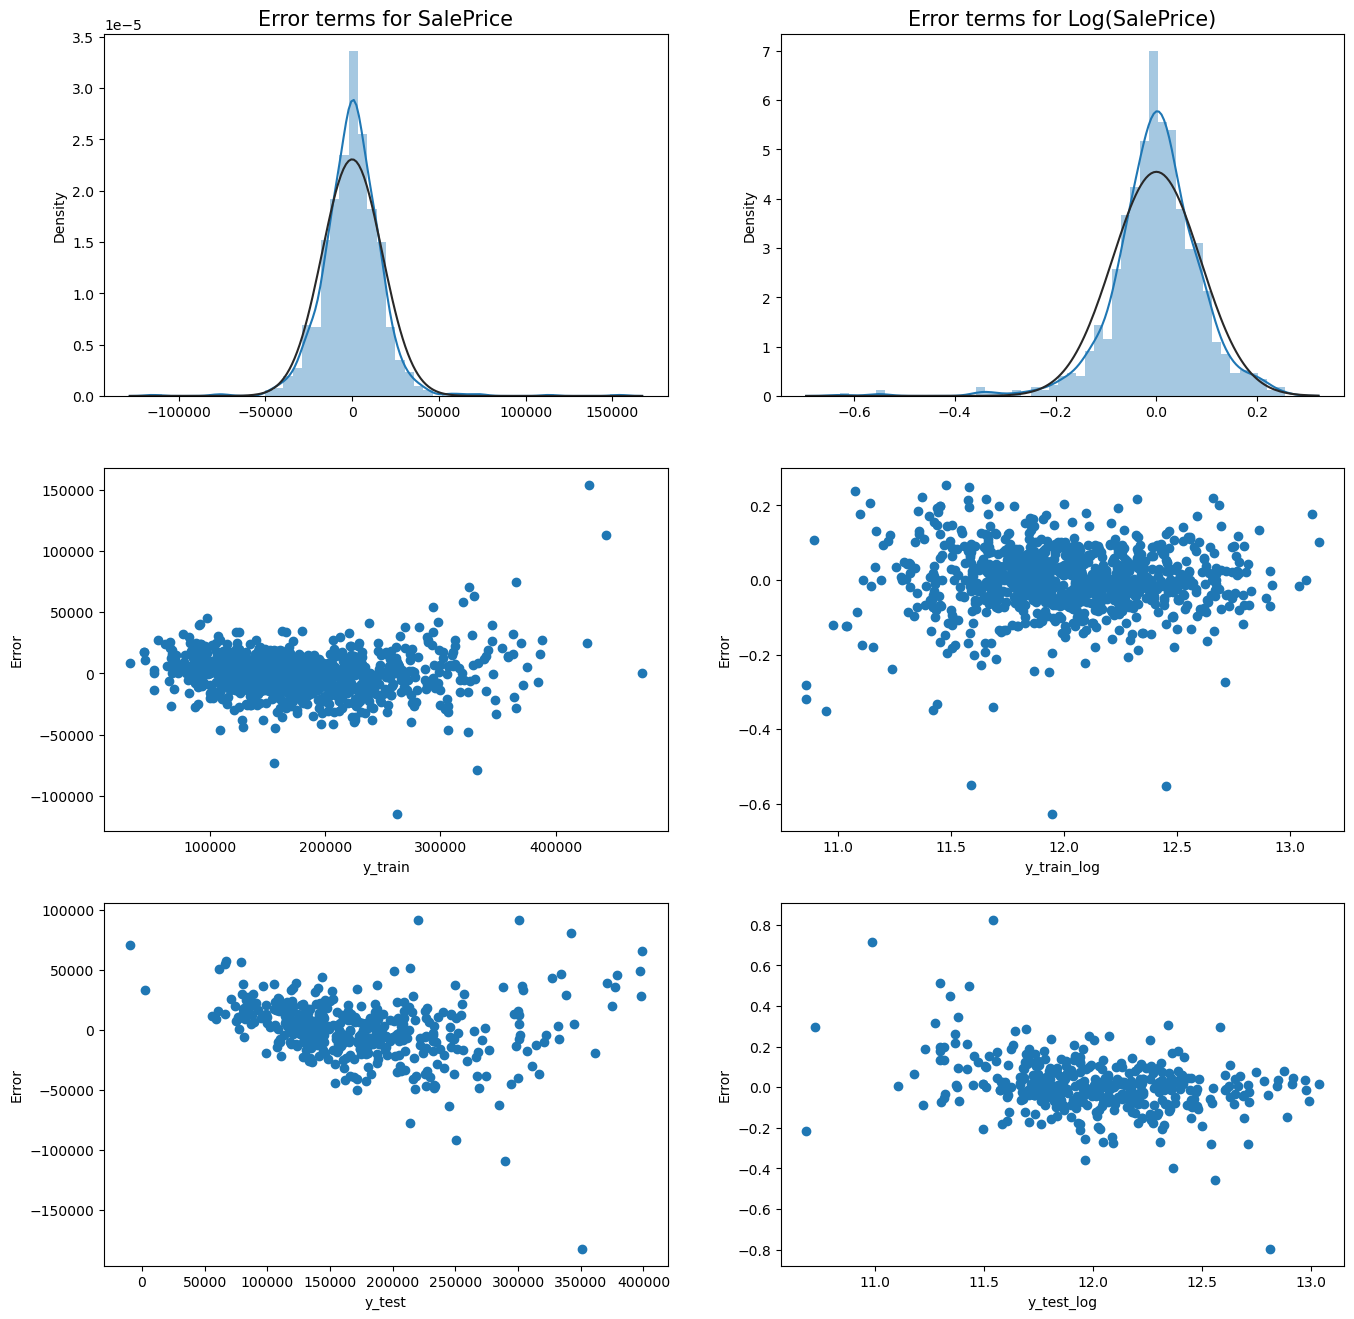

In [92]:
#comparing Error terms in the two cases

plt.figure(figsize = [16,16])

plt.subplot(3,2,1)
sns.distplot(y_train - y_train_pred, fit = norm)
plt.title('Error terms for SalePrice', fontsize = 15)
plt.xlabel('')

plt.subplot(3,2,2)
sns.distplot(y_train_log - y_train_pred_log, fit = norm)
plt.title('Error terms for Log(SalePrice)', fontsize = 15)
plt.xlabel('')

plt.subplot(3,2,3)
plt.scatter(y_train_pred, (y_train - y_train_pred))
plt.xlabel('y_train')
plt.ylabel('Error')

plt.subplot(3,2,4)
plt.scatter(y_train_pred_log, (y_train_log - y_train_pred_log))
plt.xlabel('y_train_log')
plt.ylabel('Error')

plt.subplot(3,2,5)
plt.scatter(y_pred, (y_test - y_pred))
plt.xlabel('y_test')
plt.ylabel('Error')

plt.subplot(3,2,6)
plt.scatter(y_pred_log, (y_test_log - y_pred_log))
plt.xlabel('y_test_log')
plt.ylabel('Error')

There is visible difference in the trend of error term in the two cases. In case of transformed response, the error terms look randomly distributed.

In [93]:
y_train = y_train_log
y_test = y_test_log

#### Feature Selection using RFE (coarse tuning)

In [94]:
#importing utility
from sklearn.feature_selection import RFE

In [95]:
#Eliminating features using RFE
lm = LinearRegression()
selector = RFE(estimator = lm, n_features_to_select = 100)
selector.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=100)

In [96]:
L = list(zip(X_train.columns,selector.support_,selector.ranking_))
pd.DataFrame(L, columns = ['Features','rfe_support','rfe_ranking'])[selector.support_].sort_values('rfe_ranking')

Features  rfe_support  rfe_ranking
4              OverallQual         True            1
194           Heating_Wall         True            1
192           Heating_Grav         True            1
191           Heating_GasW         True            1
190           Heating_GasA         True            1
189       BsmtFinType2_Unf         True            1
188       BsmtFinType2_Rec         True            1
187        BsmtFinType2_NA         True            1
186       BsmtFinType2_LwQ         True            1
184       BsmtFinType2_BLQ         True            1
181        BsmtFinType1_NA         True            1
180       BsmtFinType1_LwQ         True            1
176        BsmtExposure_NA         True            1
174        BsmtExposure_Gd         True            1
172       Foundation_Stone         True            1
170       Foundation_PConc         True            1
159      Exterior2nd_Other         True            1
155    Exterior2nd_CmentBd         True            1
154     Exterior2nd_CBlock         True            1
152    Exterior2nd_Brk Cmn         True            1
151    Exterior2nd_AsphShn         True            1
146      Exterior1st_Stone         True            1
197         Electrical_Mix         True            1
140     Exterior1st_CBlock         True            1
199        Functional_Maj2         True            1
202         Functional_Mod         True            1
242  SaleCondition_Partial         True            1
241   SaleCondition_Normal         True            1
239   SaleCondition_Alloca         True            1
238  SaleCondition_AdjLand         True            1
233         SaleType_ConLI         True            1
231           SaleType_Con         True            1
230           SaleType_CWD         True            1
226             Fence_GdWo         True            1
223          GarageCond_TA         True            1
222          GarageCond_Po         True            1
221          GarageCond_NA         True            1
220          GarageCond_Gd         True            1
219          GarageCond_Fa         True            1
218          GarageQual_TA         True            1
217          GarageQual_Po         True            1
216          GarageQual_NA         True            1
215          GarageQual_Gd         True            1
214          GarageQual_Fa         True            1
211        GarageFinish_NA         True            1
210          GarageType_NA         True            1
203         Functional_Sev         True            1
201        Functional_Min2         True            1
139    Exterior1st_BrkFace         True            1
138    Exterior1st_BrkComm         True            1
137    Exterior1st_AsphShn         True            1
63             MSZoning_RL         True            1
62             MSZoning_RH         True            1
61             MSZoning_FV         True            1
59          MSSubClass_180         True            1
58          MSSubClass_160         True            1
56           MSSubClass_90         True            1
53           MSSubClass_75         True            1
52           MSSubClass_70         True            1
49           MSSubClass_45         True            1
48           MSSubClass_40         True            1
22               GrLivArea         True            1
21            LowQualFinSF         True            1
20                2ndFlrSF         True            1
19                1stFlrSF         True            1
18              CentralAir         True            1
16             TotalBsmtSF         True            1
15               BsmtUnfSF         True            1
14              BsmtFinSF2         True            1
13              BsmtFinSF1         True            1
6                YearBuilt         True            1
5              OverallCond         True            1
64             MSZoning_RM         True            1
75           LotConfig_FR3         True            1
78           LandSlope_Sev         True    

In [97]:
#features selected bt rfe

cols = X_train.columns[selector.support_]
cols

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_160',
       'MSSubClass_180', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_FR3', 'LandSlope_Sev', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition2_Feedr', 'Condition2_RRAe',
       'Condition2_RRAn', 'BldgType_Duplex', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'RoofMatl_Metal', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',


In [98]:
#updated training and test sets
X_train_new = X_train[cols]
X_test_new = X_test[cols]

## Ridge Regression

In [99]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [100]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [101]:
#mean train and test scores for different parameter values

cv_df = pd.DataFrame(model_cv.cv_results_)
cv_df = cv_df[cv_df['param_alpha'] < 100]
cv_df[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['param_alpha'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001         -0.073112        -0.091684               26
1        0.001         -0.073118        -0.091646               25
2         0.01         -0.073177        -0.091304               24
3         0.05         -0.073391        -0.090204               22
4          0.1         -0.073631        -0.089337               21
5          0.2         -0.074012        -0.088321               19
6          0.3         -0.074310        -0.087749               18
7          0.4         -0.074565        -0.087369               17
8          0.5         -0.074792        -0.087080               16
9          0.6         -0.074994        -0.086886               14
10         0.7         -0.075171        -0.086730               13
11         0.8         -0.075333        -0.086617               12
12         0.9         -0.075486        -0.086532               11
13         1.0         -0.075628        -0.086458               10
14         2.0         -0.076630        -0.086040                6
15         3.0         -0.077302        -0.085938                3
16         4.0         -0.077832        -0.085901                1
17         5.0         -0.078292        -0.085912                2
18         6.0         -0.078712        -0.085964                4
19         7.0         -0.079085        -0.086032                5
20         8.0         -0.079421        -0.086108                7
21         9.0         -0.079729        -0.086182                8
22        10.0         -0.080014        -0.086263                9
23          20         -0.082136        -0.087068               15
24          50         -0.085487        -0.088821               20

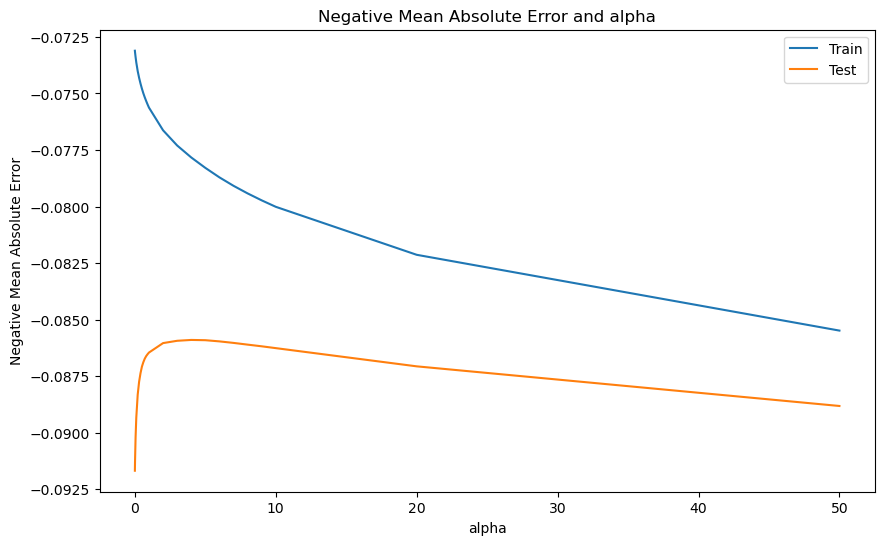

In [102]:
plt.figure(figsize = [10, 6])

plt.plot(cv_df['param_alpha'], cv_df['mean_train_score'])
plt.plot(cv_df['param_alpha'], cv_df['mean_test_score'])
plt.legend(["Train","Test"],loc='upper right')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.show()

#### Fine tuning using Gridsearch

In [103]:
#fine tuning in a tighter range to find the best value of alpha

# list of alphas to tune

params = {'alpha': np.arange(2,5,0.1)}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
       3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5,
       4.6, 4.7, 4.8, 4.9])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [104]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.400000000000002}


In [105]:
# Ridge Model for best param
ridge = Ridge(alpha=4.4)
ridge.fit(X_train_new, y_train)

y_train_pred_ridge = ridge.predict(X_train_new)
print('Train R2 Score      : ', round(r2_score(y_train, y_train_pred_ridge),4))
#MAE and RMSE
print('Train MAE           : ', round(mean_absolute_error(y_train, y_train_pred_ridge),2))
print('Train RMSE          : ', round(mean_squared_error(y_train, y_train_pred_ridge, squared = False),2), '\n')

y_test_pred_ridge = ridge.predict(X_test_new)
print('Test R2 Score       : ', round(r2_score(y_test, y_test_pred_ridge),4))
#MAE and RMSE
print('Test MAE            : ', round(mean_absolute_error(y_test, y_test_pred_ridge),2))
print('Test RMSE           : ', round(mean_squared_error(y_test, y_test_pred_ridge, squared = False),2))

Train R2 Score      :  0.9211
Train MAE           :  0.08
Train RMSE          :  0.11 

Test R2 Score       :  0.908
Test MAE            :  0.08
Test RMSE           :  0.11


## Ridge Regression Results :
### Train R2 Score = 0.9211 = 92.11%
### Test R2 Score = 0.908 = 90.8%

In [106]:
ridge.coef_

array([ 0.08161644,  0.055049  ,  0.09022359,  0.0456272 ,  0.01844149,
       -0.00107553,  0.05420291,  0.06906675,  0.04748559,  0.0587524 ,
        0.0068234 ,  0.08771044, -0.01892718,  0.03577288,  0.04410861,
        0.02260689, -0.02659152, -0.12173989, -0.05890861,  0.13045033,
        0.05023231,  0.07599819,  0.01067738, -0.01735389, -0.00101017,
        0.03903026,  0.10276308, -0.06208984, -0.04226018,  0.07185965,
        0.07181607,  0.02897146, -0.058255  ,  0.0032266 , -0.02485176,
        0.        , -0.02659152,  0.00375352, -0.03847846,  0.01624312,
       -0.07894409,  0.01482639,  0.05973799,  0.0087969 ,  0.03942908,
       -0.0600894 , -0.01114405,  0.05857878, -0.006     , -0.05201922,
        0.05157193, -0.02327387,  0.01346042, -0.006     ,  0.00931094,
       -0.02327387,  0.02670546, -0.02081389,  0.0508096 ,  0.05162174,
        0.07012151,  0.01105104, -0.05427129,  0.01105104, -0.06016089,
       -0.02083023,  0.01105104, -0.01967583, -0.01116532,  0.00

In [107]:
ridge_df = pd.DataFrame({'Features': ridge.feature_names_in_, 'Coefficients': ridge.coef_})
ridge_df.sort_values('Coefficients', ascending = False)

Features  Coefficients
19            MSZoning_FV      0.130450
97  SaleCondition_Partial      0.122586
26   Neighborhood_Crawfor      0.102763
2               YearBuilt      0.090224
11              GrLivArea      0.087710
0             OverallQual      0.081616
21            MSZoning_RL      0.075998
29   Neighborhood_NridgHt      0.071860
30   Neighborhood_StoneBr      0.071816
60        BsmtExposure_Gd      0.070122
7              CentralAir      0.069067
96   SaleCondition_Normal      0.063808
42      RoofStyle_Mansard      0.059738
9                2ndFlrSF      0.058752
47       RoofMatl_WdShngl      0.058579
94  SaleCondition_AdjLand      0.056045
1             OverallCond      0.055049
6             TotalBsmtSF      0.054203
59       Foundation_Stone      0.051622
72           Heating_Wall      0.051586
50    Exterior1st_BrkFace      0.051572
58       Foundation_PConc      0.050810
20            MSZoning_RH      0.050232
91           SaleType_CWD      0.048751
8                1stFlrSF      0.047486
3              BsmtFinSF1      0.045627
14          MSSubClass_70      0.044109
44         RoofMatl_Metal      0.039429
25   Neighborhood_BrkSide      0.039030
13          MSSubClass_45      0.035773
89          GarageCond_TA      0.033841
70           Heating_GasW      0.033386
31        Condition1_PosN      0.028971
56    Exterior2nd_CmentBd      0.026705
98          GarageAge_New      0.024618
15          MSSubClass_75      0.022607
4              BsmtFinSF2      0.018441
39        RoofStyle_Gable      0.016243
92           SaleType_Con      0.015524
41          RoofStyle_Hip      0.014826
52      Exterior1st_Stone      0.013460
86          GarageCond_Gd      0.013211
61        BsmtExposure_NA      0.011051
63        BsmtFinType1_NA      0.011051
66        BsmtFinType2_NA      0.011051
22            MSZoning_RM      0.010677
54    Exterior2nd_Brk Cmn      0.009311
43         RoofStyle_Shed      0.008797
69           Heating_GasA      0.007254
10           LowQualFinSF      0.006823
37      HouseStyle_1.5Unf      0.003754
33       Condition2_Feedr      0.003227
95   SaleCondition_Alloca      0.003151
99          GarageAge_Old      0.001308
35        Condition2_RRAn      0.000000
73         Electrical_Mix     -0.000279
24          LandSlope_Sev     -0.001010
5               BsmtUnfSF     -0.001076
81          GarageQual_Gd     -0.005789
48    Exterior1st_AsphShn     -0.006000
53    Exterior2nd_AsphShn     -0.006000
83          GarageQual_Po     -0.010105
46       RoofMatl_WdShake     -0.011144
68       BsmtFinType2_Unf     -0.011165
23          LotConfig_FR3     -0.017354
12          MSSubClass_40     -0.018927
67       BsmtFinType2_Rec     -0.019676
57      Exterior2nd_Other     -0.020814
65       BsmtFinType2_LwQ     -0.020830
84          GarageQual_TA     -0.023190
51     Exterior1st_CBlock     -0.023274
55     Exterior2nd_CBlock     -0.023274
34        Condition2_RRAe     -0.024852
85          GarageCond_Fa     -0.024954
90             Fence_GdWo     -0.025717
78          GarageType_NA     -0.025926
79        GarageFinish_NA     -0.025926
82          GarageQual_NA     -0.025926
87          GarageCond_NA     -0.025926
36        BldgType_Duplex     -0.026592
16          MSSubClass_90     -0.026592
93         SaleType_ConLI     -0.031902
80          GarageQual_Fa     -0.036396
75        Functional_Min2     -0.037811
38      HouseStyle_2.5Fin     -0.038478
88          GarageCond_Po     -0.038998
28   Neighborhood_Mitchel     -0.042260
49    Exterior1st_BrkComm     -0.052019
62       BsmtFinType1_LwQ     -0.054271
32        Condition1_RRAe     -0.058255
77         Functional_Sev     -0.058654
18         MSSubClass_180     -0.058909
45       RoofMatl_Tar&Grv     -0.060089
64       BsmtFinType2_BLQ     -0.060161
27   Neighborhood_MeadowV     -0.062090
71           Heating_Grav     -0.070284
40      RoofStyle_Gambrel     -0.078944
76         Functional_Mod     -0.103251
74        Functional_Maj2     -0.105349
17         MSSubC

There are still a lot of variable to draw inference from.
* The goal of this study is to design a predictive model with can predict the price of the house for the given context, given a set of features.

* The other more important goal of making a model is for inferencial reason, i.e, the model will be used to explore the strength of the relationships between the response and the predictors.

For this reason, an intelligent way of feature elimination must be implemented without compromising much on the model performance. **Lasso** should perform better in situations where only a few among all the predictors that are used to build our model have a significant influence on the response variable. So, it also acts as feature selection method, which removes the unrelated variables.

## Lasso Regression

In [108]:
params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()

folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [109]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [110]:
#mean train and test scores for different parameter values

cv_df = pd.DataFrame(model_cv.cv_results_)
cv_df = cv_df[cv_df['param_alpha'] < 10]
cv_df[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['param_alpha'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
0      0.00001         -0.073252        -0.091904                3
1       0.0001         -0.075233        -0.088206                2
2        0.001         -0.082951        -0.087318                1
3         0.01         -0.100544        -0.102220                4
4         0.05         -0.122807        -0.123606                5
5          0.1         -0.155097        -0.155617                6
6          0.2         -0.229338        -0.229767                7
7          0.3         -0.292798        -0.293139                8
8          0.4         -0.303713        -0.303842                9
9          0.5         -0.303713        -0.303842                9
10         0.6         -0.303713        -0.303842                9
11         0.7         -0.303713        -0.303842                9
12         0.8         -0.303713        -0.303842                9
13         0.9         -0.303713        -0.303842                9
14         1.0         -0.303713        -0.303842                9
15         2.0         -0.303713        -0.303842                9
16         3.0         -0.303713        -0.303842                9
17         4.0         -0.303713        -0.303842                9
18         5.0         -0.303713        -0.303842                9
19         6.0         -0.303713        -0.303842                9
20         7.0         -0.303713        -0.303842                9
21         8.0         -0.303713        -0.303842                9
22         9.0         -0.303713        -0.303842                9

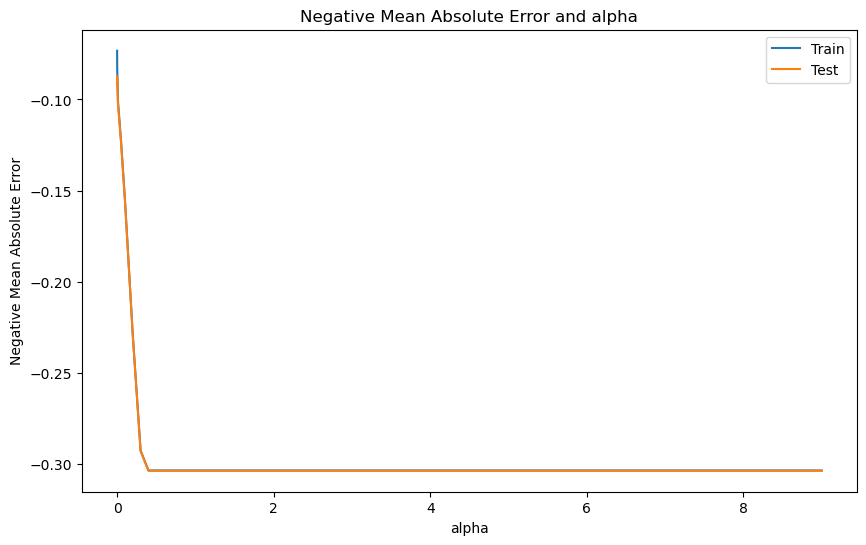

In [111]:
plt.figure(figsize = [10, 6])

plt.plot(cv_df['param_alpha'], cv_df['mean_train_score'])
plt.plot(cv_df['param_alpha'], cv_df['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(["Train","Test"],loc='upper right')
plt.show()

#### Fine tuning using Gridsearch

In [112]:
#fine tuning in a tighter range to find the best value of alpha

# list of alphas to tune

params = {'alpha': np.arange(0,0.002,0.00001)}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.00e+00, 1.00e-05, 2.00e-05, 3.00e-05, 4.00e-05, 5.00e-05,
       6.00e-05, 7.00e-05, 8.00e-05, 9.00e-05, 1.00e-04, 1.10e-04,
       1.20e-04, 1.30e-04, 1.40e-04, 1.50e-04, 1.60e-04, 1.70e-04,
       1.80e-04, 1.90e-04, 2.00e-04, 2.10e-04, 2.20e-04, 2.30e-04,
       2.40e-04, 2.50e-04, 2.60e-04, 2.70e-04, 2.80e-04, 2.90e-04,
       3.00e-04, 3.10e-04...
       1.68e-03, 1.69e-03, 1.70e-03, 1.71e-03, 1.72e-03, 1.73e-03,
       1.74e-03, 1.75e-03, 1.76e-03, 1.77e-03, 1.78e-03, 1.79e-03,
       1.80e-03, 1.81e-03, 1.82e-03, 1.83e-03, 1.84e-03, 1.85e-03,
       1.86e-03, 1.87e-03, 1.88e-03, 1.89e-03, 1.90e-03, 1.91e-03,
       1.92e-03, 1.93e-03, 1.94e-03, 1.95e-03, 1.96e-03, 1.97e-03,
       1.98e-03, 1.99e-03])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [113]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.00059}


In [114]:
# Lasso Model for best param
lasso = Lasso(alpha=0.00059)
lasso.fit(X_train_new, y_train)

y_train_pred_lasso = lasso.predict(X_train_new)
print('Train R2 Score      : ', round(r2_score(y_train, y_train_pred_lasso),4))
#MAE and RMSE
print('Train MAE           : ', round(mean_absolute_error(y_train, y_train_pred_lasso),4))
print('Train RMSE          : ', round(mean_squared_error(y_train, y_train_pred_lasso, squared = False),4), '\n')

y_test_pred_lasso = lasso.predict(X_test_new)
print('Test R2 Score       : ', round(r2_score(y_test, y_test_pred_lasso),4))
#MAE and RMSE
print('Test MAE            : ', round(mean_absolute_error(y_test, y_test_pred_lasso),4))
print('Test RMSE           : ', round(mean_squared_error(y_test, y_test_pred_lasso, squared = False),4))

Train R2 Score      :  0.914
Train MAE           :  0.0813
Train RMSE          :  0.1136 

Test R2 Score       :  0.9124
Test MAE            :  0.0784
Test RMSE           :  0.1066


Lasso surely out-performs ridge when it comes to prediction on unseen data (test set). Regression loss is almost identical.

Now, instead of using the most most optimal alpha value, we can push it a little higher for it to perform feature selection. It also acts as feature selection method, which removes the unrelated variables.

## Lasso Regression Results :
### Train R2 Score = 0.914 = 91.4%
### Test R2 Score = 0.9124 = 91.24%

### Selecting Most Important features using Lasso

In [115]:
# Lasso Model for best param
lasso = Lasso(alpha=0.00059)
lasso.fit(X_train_new, y_train)

y_train_pred_lasso = lasso.predict(X_train_new)
print('Train R2 Score      : ', round(r2_score(y_train, y_train_pred_lasso),4))
#MAE and RMSE
print('Train MAE           : ', round(mean_absolute_error(y_train, y_train_pred_lasso),4))
print('Train RMSE          : ', round(mean_squared_error(y_train, y_train_pred_lasso, squared = False),4), '\n')

y_test_pred_lasso = lasso.predict(X_test_new)
print('Test R2 Score       : ', round(r2_score(y_test, y_test_pred_lasso),4))
#MAE and RMSE
print('Test MAE            : ', round(mean_absolute_error(y_test, y_test_pred_lasso),4))
print('Test RMSE           : ', round(mean_squared_error(y_test, y_test_pred_lasso, squared = False),4))

Train R2 Score      :  0.914
Train MAE           :  0.0813
Train RMSE          :  0.1136 

Test R2 Score       :  0.9124
Test MAE            :  0.0784
Test RMSE           :  0.1066


In [116]:
lasso.coef_

array([ 9.08831006e-02,  5.72154781e-02,  8.95808435e-02,  4.58047256e-02,
        1.59107073e-02, -0.00000000e+00,  4.49408226e-02,  5.17094783e-02,
        6.64506294e-03,  0.00000000e+00, -2.68298528e-05,  1.51778500e-01,
       -0.00000000e+00,  0.00000000e+00,  1.80848617e-02,  0.00000000e+00,
       -2.52723608e-02, -1.19806708e-01, -1.26422058e-02,  1.18685176e-01,
        0.00000000e+00,  6.45065102e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.89830721e-02,  1.08271851e-01, -2.40617927e-02,
       -2.94276267e-02,  6.34180194e-02,  5.68203874e-02,  0.00000000e+00,
       -1.96178866e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -2.25299569e-03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -3.03150346e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -1.89543328e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  4.21400887e-02, -0.00000000e+00,
        0.00000000e+00, -

In [117]:
lasso_df = pd.DataFrame({'Features': lasso.feature_names_in_, 'Coefficients': lasso.coef_})
lasso_df = lasso_df[lasso_df.Coefficients != 0].sort_values('Coefficients', ascending = False).reset_index().drop('index', axis = 1)
lasso_df

Features  Coefficients
0               GrLivArea      0.151778
1   SaleCondition_Partial      0.125005
2             MSZoning_FV      0.118685
3    Neighborhood_Crawfor      0.108272
4             OverallQual      0.090883
5               YearBuilt      0.089581
6             MSZoning_RL      0.064507
7    SaleCondition_Normal      0.063537
8    Neighborhood_NridgHt      0.063418
9         BsmtExposure_Gd      0.060071
10            OverallCond      0.057215
11   Neighborhood_StoneBr      0.056820
12       Foundation_PConc      0.052024
13             CentralAir      0.051709
14          GarageCond_TA      0.049397
15             BsmtFinSF1      0.045805
16            TotalBsmtSF      0.044941
17    Exterior1st_BrkFace      0.042140
18   Neighborhood_BrkSide      0.028983
19          GarageAge_New      0.019465
20          MSSubClass_70      0.018085
21             BsmtFinSF2      0.015911
22               1stFlrSF      0.006645
23           LowQualFinSF     -0.000027
24        BldgType_Duplex     -0.002253
25          GarageCond_NA     -0.011560
26         MSSubClass_180     -0.012642
27             Fence_GdWo     -0.013255
28        Functional_Min2     -0.016985
29       RoofMatl_Tar&Grv     -0.018954
30        Condition1_RRAe     -0.019618
31           Heating_Grav     -0.023611
32   Neighborhood_MeadowV     -0.024062
33          MSSubClass_90     -0.025272
34       BsmtFinType2_BLQ     -0.027177
35   Neighborhood_Mitchel     -0.029428
36      RoofStyle_Gambrel     -0.030315
37       BsmtFinType1_LwQ     -0.043285
38          GarageType_NA     -0.046763
39         Functional_Mod     -0.072832
40        Functional_Maj2     -0.077016
41         MSSubClass_160     -0.119807

In [118]:
#function to check for the VIF values of the feature variables. 
def get_vif(cols):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [119]:
get_vif(lasso_df['Features'])

Features    VIF
24        BldgType_Duplex    inf
38          GarageType_NA    inf
33          MSSubClass_90    inf
25          GarageCond_NA    inf
14          GarageCond_TA  18.55
13             CentralAir  16.97
7    SaleCondition_Normal   9.00
6             MSZoning_RL   8.18
12       Foundation_PConc   4.33
5               YearBuilt   3.85
19          GarageAge_New   3.61
22               1stFlrSF   3.58
16            TotalBsmtSF   3.56
4             OverallQual   3.46
1   SaleCondition_Partial   2.17
0               GrLivArea   2.06
32   Neighborhood_MeadowV   1.77
20          MSSubClass_70   1.69
26         MSSubClass_180   1.66
2             MSZoning_FV   1.65
41         MSSubClass_160   1.57
15             BsmtFinSF1   1.52
10            OverallCond   1.47
8    Neighborhood_NridgHt   1.46
21             BsmtFinSF2   1.35
9         BsmtExposure_Gd   1.33
3    Neighborhood_Crawfor   1.33
37       BsmtFinType1_LwQ   1.26
18   Neighborhood_BrkSide   1.21
23           LowQualFinSF   1.19
34       BsmtFinType2_BLQ   1.18
36      RoofStyle_Gambrel   1.14
11   Neighborhood_StoneBr   1.14
27             Fence_GdWo   1.12
35   Neighborhood_Mitchel   1.12
17    Exterior1st_BrkFace   1.11
31           Heating_Grav   1.11
28        Functional_Min2   1.10
40        Functional_Maj2   1.07
29       RoofMatl_Tar&Grv   1.06
30        Condition1_RRAe   1.06
39         Functional_Mod   1.06

## Conclusion

# Final Observations on performance of differenct models.

## Ridge:
- Train R2 Score      :  0.9211
- Train MAE           :  0.08
- Train RMSE          :  0.11

<br>

- Test R2 Score       :  0.908
- Test MAE            :  0.08
- Test RMSE           :  0.11

<br>
<br>

## Lasso:
- Train R2 Score      :  0.914
- Train MAE           :  0.0813
- Train RMSE          :  0.1136

<br>

- Test R2 Score       :  0.9124
- Test MAE            :  0.0784
- Test RMSE           :  0.1066


Considering performance on test set, Lasso has performed slightly better than Ridge.

Further, Lasso was used with a different value of alpha for intelligent feature selection, and reduced the number of variables down to 13 most important variables.

According to the final model, the variables that impact the price of house are,

In [120]:
lasso_df = lasso_df.sort_values('Coefficients')
lasso_df

Features  Coefficients
41         MSSubClass_160     -0.119807
40        Functional_Maj2     -0.077016
39         Functional_Mod     -0.072832
38          GarageType_NA     -0.046763
37       BsmtFinType1_LwQ     -0.043285
36      RoofStyle_Gambrel     -0.030315
35   Neighborhood_Mitchel     -0.029428
34       BsmtFinType2_BLQ     -0.027177
33          MSSubClass_90     -0.025272
32   Neighborhood_MeadowV     -0.024062
31           Heating_Grav     -0.023611
30        Condition1_RRAe     -0.019618
29       RoofMatl_Tar&Grv     -0.018954
28        Functional_Min2     -0.016985
27             Fence_GdWo     -0.013255
26         MSSubClass_180     -0.012642
25          GarageCond_NA     -0.011560
24        BldgType_Duplex     -0.002253
23           LowQualFinSF     -0.000027
22               1stFlrSF      0.006645
21             BsmtFinSF2      0.015911
20          MSSubClass_70      0.018085
19          GarageAge_New      0.019465
18   Neighborhood_BrkSide      0.028983
17    Exterior1st_BrkFace      0.042140
16            TotalBsmtSF      0.044941
15             BsmtFinSF1      0.045805
14          GarageCond_TA      0.049397
13             CentralAir      0.051709
12       Foundation_PConc      0.052024
11   Neighborhood_StoneBr      0.056820
10            OverallCond      0.057215
9         BsmtExposure_Gd      0.060071
8    Neighborhood_NridgHt      0.063418
7    SaleCondition_Normal      0.063537
6             MSZoning_RL      0.064507
5               YearBuilt      0.089581
4             OverallQual      0.090883
3    Neighborhood_Crawfor      0.108272
2             MSZoning_FV      0.118685
1   SaleCondition_Partial      0.125005
0               GrLivArea      0.151778

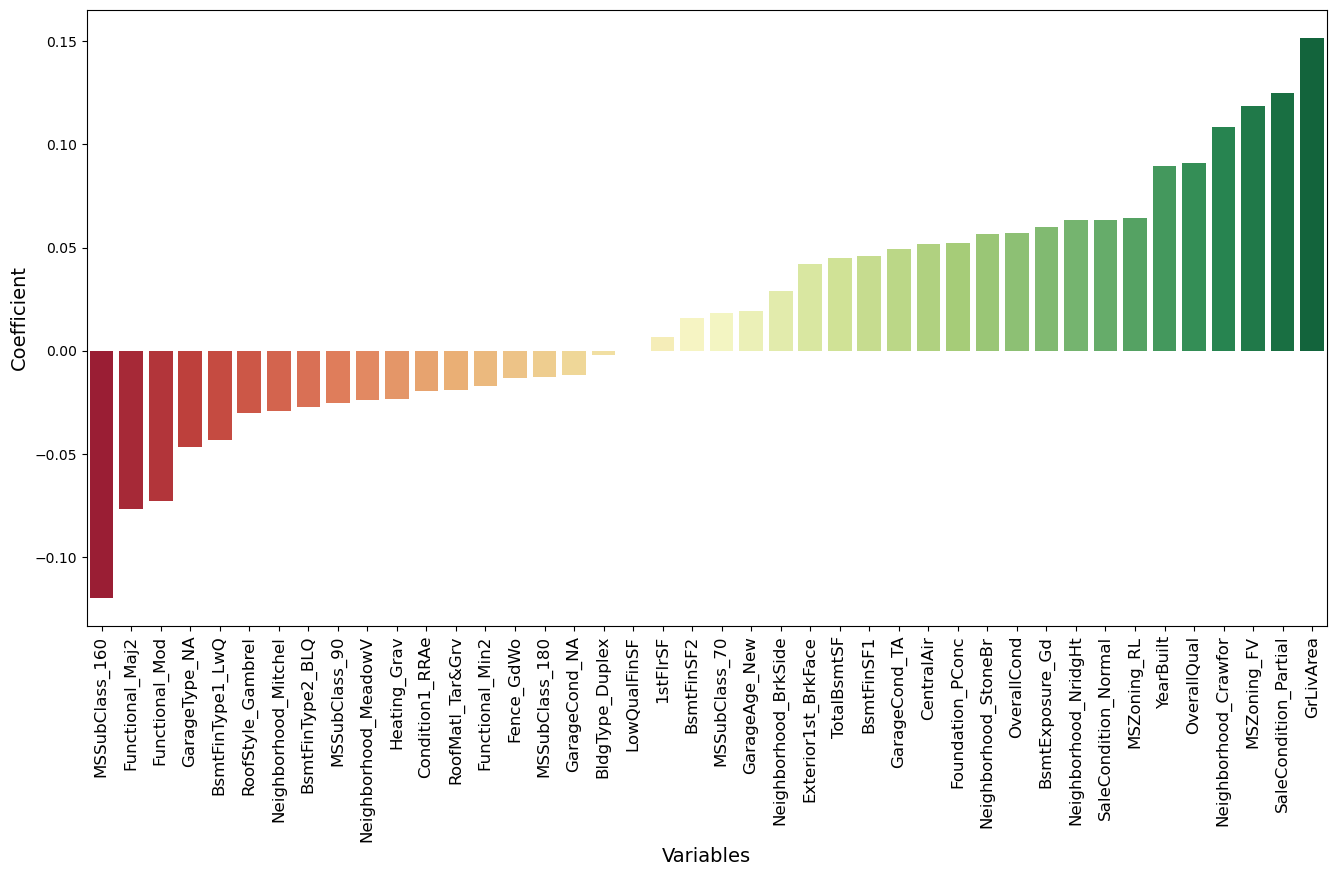

In [121]:
#visualizing coefficients of most important features

plt.figure(figsize = [16,8])
sns.barplot(lasso_df['Features'], lasso_df['Coefficients'], palette = 'RdYlGn')
plt.ylabel('Coefficient', fontsize = 14)
plt.xlabel('Variables', fontsize = 14)
plt.xticks(fontsize = 12, rotation = 90)

plt.show()

A non-linear relationship has been established between the resgressors and the resposnse. Considering the final model, the price of houses are influenced by all the green factors, of which the top 6 are :
- GrLivArea
- SaleCondition_Partial
- MSZoning_FV
- Neighborhood_CRawfor
- OverallQual
- YearBuilt

Subjective Questions

In [123]:
# Ridge Model with alpha value doubled
ridge = Ridge(alpha=8.8)
ridge.fit(X_train_new, y_train)

y_train_pred_ridge = ridge.predict(X_train_new)
print('Train R2 Score      : ', round(r2_score(y_train, y_train_pred_ridge),4))
#MAE and RMSE
print('Train MAE           : ', round(mean_absolute_error(y_train, y_train_pred_ridge),2))
print('Train RMSE          : ', round(mean_squared_error(y_train, y_train_pred_ridge, squared = False),2), '\n')

y_test_pred_ridge = ridge.predict(X_test_new)
print('Test R2 Score       : ', round(r2_score(y_test, y_test_pred_ridge),4))
#MAE and RMSE
print('Test MAE            : ', round(mean_absolute_error(y_test, y_test_pred_ridge),2))
print('Test RMSE           : ', round(mean_squared_error(y_test, y_test_pred_ridge, squared = False),2))

Train R2 Score      :  0.9176
Train MAE           :  0.08
Train RMSE          :  0.11 

Test R2 Score       :  0.9094
Test MAE            :  0.08
Test RMSE           :  0.11


In [125]:
ridge.coef_

array([ 0.08560939,  0.05698622,  0.08843715,  0.04551178,  0.01794439,
       -0.00152623,  0.05337352,  0.06162035,  0.04919007,  0.05775221,
        0.00561474,  0.08791915, -0.00991781,  0.02379555,  0.03767089,
        0.01415074, -0.02287142, -0.10432686, -0.03930504,  0.09316073,
        0.02244878,  0.05204381, -0.01665137, -0.00991647, -0.00075207,
        0.03561435,  0.09202368, -0.0487033 , -0.03778882,  0.06159047,
        0.05530344,  0.02300319, -0.04403234,  0.00180442, -0.0129541 ,
        0.        , -0.02287142,  0.00851719, -0.02003451,  0.0156634 ,
       -0.05373411,  0.01369844,  0.04006564,  0.00282299,  0.02246713,
       -0.04098349, -0.00420525,  0.03253322, -0.0043502 , -0.03223347,
        0.04652056, -0.01332248,  0.0078005 , -0.0043502 , -0.00255015,
       -0.01332248,  0.02105467, -0.00968403,  0.05269039,  0.0346318 ,
        0.0639042 ,  0.01141225, -0.04815864,  0.01141225, -0.04537276,
       -0.01163526,  0.01141225, -0.01417456, -0.00421877,  0.00

In [127]:
ridge_df = pd.DataFrame({'Features': ridge.feature_names_in_, 'Coefficients': ridge.coef_})
ridge_df.sort_values('Coefficients', ascending = False)

Features  Coefficients
97  SaleCondition_Partial      0.110385
19            MSZoning_FV      0.093161
26   Neighborhood_Crawfor      0.092024
2               YearBuilt      0.088437
11              GrLivArea      0.087919
0             OverallQual      0.085609
60        BsmtExposure_Gd      0.063904
7              CentralAir      0.061620
29   Neighborhood_NridgHt      0.061590
9                2ndFlrSF      0.057752
1             OverallCond      0.056986
96   SaleCondition_Normal      0.056425
30   Neighborhood_StoneBr      0.055303
6             TotalBsmtSF      0.053374
58       Foundation_PConc      0.052690
21            MSZoning_RL      0.052044
8                1stFlrSF      0.049190
50    Exterior1st_BrkFace      0.046521
3              BsmtFinSF1      0.045512
42      RoofStyle_Mansard      0.040066
14          MSSubClass_70      0.037671
25   Neighborhood_BrkSide      0.035614
59       Foundation_Stone      0.034632
89          GarageCond_TA      0.033207
47       RoofMatl_WdShngl      0.032533
72           Heating_Wall      0.031256
94  SaleCondition_AdjLand      0.030845
91           SaleType_CWD      0.029926
98          GarageAge_New      0.025382
13          MSSubClass_45      0.023796
31        Condition1_PosN      0.023003
70           Heating_GasW      0.022891
44         RoofMatl_Metal      0.022467
20            MSZoning_RH      0.022449
56    Exterior2nd_CmentBd      0.021055
4              BsmtFinSF2      0.017944
39        RoofStyle_Gable      0.015663
15          MSSubClass_75      0.014151
41          RoofStyle_Hip      0.013698
63        BsmtFinType1_NA      0.011412
61        BsmtExposure_NA      0.011412
66        BsmtFinType2_NA      0.011412
86          GarageCond_Gd      0.011186
92           SaleType_Con      0.009725
37      HouseStyle_1.5Unf      0.008517
52      Exterior1st_Stone      0.007800
10           LowQualFinSF      0.005615
69           Heating_GasA      0.004086
43         RoofStyle_Shed      0.002823
81          GarageQual_Gd      0.002582
33       Condition2_Feedr      0.001804
35        Condition2_RRAn      0.000000
24          LandSlope_Sev     -0.000752
5               BsmtUnfSF     -0.001526
95   SaleCondition_Alloca     -0.001897
99          GarageAge_Old     -0.001941
54    Exterior2nd_Brk Cmn     -0.002550
73         Electrical_Mix     -0.003837
46       RoofMatl_WdShake     -0.004205
68       BsmtFinType2_Unf     -0.004219
48    Exterior1st_AsphShn     -0.004350
53    Exterior2nd_AsphShn     -0.004350
83          GarageQual_Po     -0.007978
84          GarageQual_TA     -0.008198
57      Exterior2nd_Other     -0.009684
23          LotConfig_FR3     -0.009916
12          MSSubClass_40     -0.009918
65       BsmtFinType2_LwQ     -0.011635
34        Condition2_RRAe     -0.012954
51     Exterior1st_CBlock     -0.013322
55     Exterior2nd_CBlock     -0.013322
67       BsmtFinType2_Rec     -0.014175
22            MSZoning_RM     -0.016651
80          GarageQual_Fa     -0.019392
38      HouseStyle_2.5Fin     -0.020035
85          GarageCond_Fa     -0.020823
90             Fence_GdWo     -0.021848
93         SaleType_ConLI     -0.022588
16          MSSubClass_90     -0.022871
36        BldgType_Duplex     -0.022871
78          GarageType_NA     -0.023442
82          GarageQual_NA     -0.023442
87          GarageCond_NA     -0.023442
79        GarageFinish_NA     -0.023442
88          GarageCond_Po     -0.024023
75        Functional_Min2     -0.031413
49    Exterior1st_BrkComm     -0.032233
77         Functional_Sev     -0.035231
28   Neighborhood_Mitchel     -0.037789
18         MSSubClass_180     -0.039305
45       RoofMatl_Tar&Grv     -0.040983
32        Condition1_RRAe     -0.044032
64       BsmtFinType2_BLQ     -0.045373
71           Heating_Grav     -0.046525
62       BsmtFinType1_LwQ     -0.048159
27   Neighborhood_MeadowV     -0.048703
40      RoofStyle_Gambrel     -0.053734
74        Functional_Maj2     -0.068599
76         Functional_Mod     -0.071287
17         MSSubC

# Lasso

In [129]:
# Lasso Model for alpha value doubled
lasso = Lasso(alpha=0.00118)
lasso.fit(X_train_new, y_train)

y_train_pred_lasso = lasso.predict(X_train_new)
print('Train R2 Score      : ', round(r2_score(y_train, y_train_pred_lasso),4))
#MAE and RMSE
print('Train MAE           : ', round(mean_absolute_error(y_train, y_train_pred_lasso),4))
print('Train RMSE          : ', round(mean_squared_error(y_train, y_train_pred_lasso, squared = False),4), '\n')

y_test_pred_lasso = lasso.predict(X_test_new)
print('Test R2 Score       : ', round(r2_score(y_test, y_test_pred_lasso),4))
#MAE and RMSE
print('Test MAE            : ', round(mean_absolute_error(y_test, y_test_pred_lasso),4))
print('Test RMSE           : ', round(mean_squared_error(y_test, y_test_pred_lasso, squared = False),4))

Train R2 Score      :  0.9071
Train MAE           :  0.0843
Train RMSE          :  0.1181 

Test R2 Score       :  0.9092
Test MAE            :  0.0796
Test RMSE           :  0.1086


In [130]:
lasso.coef_

array([ 0.09897968,  0.06006665,  0.08754267,  0.04627194,  0.01309214,
       -0.        ,  0.04632411,  0.04326777,  0.00739578,  0.        ,
       -0.00115864,  0.15024701, -0.        ,  0.        ,  0.        ,
        0.        , -0.00593242, -0.09692246, -0.        ,  0.06807989,
        0.        ,  0.04202073, -0.02269099, -0.        , -0.        ,
        0.01439548,  0.09530115, -0.        , -0.01358219,  0.04050028,
        0.00620836,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.00261089,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.02464759, -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.05544926,  0.        ,
        0.04607497,  0.        , -0.02508519,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.  

In [131]:
lasso_df = pd.DataFrame({'Features': lasso.feature_names_in_, 'Coefficients': lasso.coef_})
lasso_df = lasso_df[lasso_df.Coefficients != 0].sort_values('Coefficients', ascending = False).reset_index().drop('index', axis = 1)
lasso_df

Features  Coefficients
0               GrLivArea      0.150247
1   SaleCondition_Partial      0.110913
2             OverallQual      0.098980
3    Neighborhood_Crawfor      0.095301
4               YearBuilt      0.087543
5             MSZoning_FV      0.068080
6             OverallCond      0.060067
7        Foundation_PConc      0.055449
8    SaleCondition_Normal      0.051740
9             TotalBsmtSF      0.046324
10             BsmtFinSF1      0.046272
11        BsmtExposure_Gd      0.046075
12          GarageCond_TA      0.043529
13             CentralAir      0.043268
14            MSZoning_RL      0.042021
15   Neighborhood_NridgHt      0.040500
16    Exterior1st_BrkFace      0.024648
17          GarageAge_New      0.024501
18   Neighborhood_BrkSide      0.014395
19             BsmtFinSF2      0.013092
20               1stFlrSF      0.007396
21   Neighborhood_StoneBr      0.006208
22           LowQualFinSF     -0.001159
23        BldgType_Duplex     -0.002611
24          MSSubClass_90     -0.005932
25          GarageCond_NA     -0.013434
26   Neighborhood_Mitchel     -0.013582
27            MSZoning_RM     -0.022691
28       BsmtFinType1_LwQ     -0.025085
29          GarageType_NA     -0.045089
30         MSSubClass_160     -0.096922

## Question 3

### Below are the 5 best predictor variables for Lasso Regression.
- GrLivArea
- SaleCondition_Partial
- OverallQual
- Neighborhood_Crawfor
- YearBuilt

In [135]:
# Creating a reduced dataset without the above mentioned columns
cols_to_exclude = ['GrLivArea','SaleCondition_Partial','OverallQual','Neighborhood_Crawfor','YearBuilt']
X_train_reduced = X_train_new.drop(columns=cols_to_exclude)
y_train_reduced = y_train.drop(columns=cols_to_exclude)

In [138]:
X_test_reduced = X_test_new.drop(columns=cols_to_exclude)
y_test_reduced = y_test.drop(columns=cols_to_exclude)

In [141]:
# Lasso Model for alpha value doubled
lasso = Lasso(alpha=0.00118)
lasso.fit(X_train_reduced, y_train_reduced)

y_train_pred_reduced = lasso.predict(X_train_reduced)
print('Train R2 Score      : ', round(r2_score(y_train_reduced, y_train_pred_reduced),4))
#MAE and RMSE
print('Train MAE           : ', round(mean_absolute_error(y_train_reduced, y_train_pred_reduced),4))
print('Train RMSE          : ', round(mean_squared_error(y_train_reduced, y_train_pred_reduced, squared = False),4), '\n')

y_test_pred_reduced = lasso.predict(X_test_reduced)
print('Test R2 Score       : ', round(r2_score(y_test_reduced, y_test_pred_reduced),4))
#MAE and RMSE
print('Test MAE            : ', round(mean_absolute_error(y_test_reduced, y_test_pred_reduced),4))
print('Test RMSE           : ', round(mean_squared_error(y_test_reduced, y_test_pred_reduced, squared = False),4))

Train R2 Score      :  0.8653
Train MAE           :  0.1045
Train RMSE          :  0.1422 

Test R2 Score       :  0.862
Test MAE            :  0.1028
Test RMSE           :  0.1338


In [142]:
lasso.coef_

array([ 0.06100475,  0.05458847,  0.01596462, -0.        ,  0.07198759,
        0.10850063,  0.14102586,  0.16404805,  0.00501828, -0.        ,
        0.        ,  0.        , -0.        , -0.0186027 , -0.0357011 ,
       -0.        ,  0.17723197,  0.        ,  0.10892141, -0.00686349,
       -0.        , -0.        , -0.        , -0.        , -0.00659058,
        0.09105708,  0.07448309,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.0095173 ,  0.        , -0.        ,
       -0.        , -0.        ,  0.01082303,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.0183209 , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.01265896, -0.        ,  0.15554256,
        0.        ,  0.0753415 ,  0.        , -0.04507256,  0.        ,
       -0.01625124,  0.        ,  0.        , -0.01621796, -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.  

In [143]:
lasso_df = pd.DataFrame({'Features': lasso.feature_names_in_, 'Coefficients': lasso.coef_})
lasso_df = lasso_df[lasso_df.Coefficients != 0].sort_values('Coefficients', ascending = False).reset_index().drop('index', axis = 1)
lasso_df

Features  Coefficients
0            MSZoning_FV      0.177232
1               2ndFlrSF      0.164048
2       Foundation_PConc      0.155543
3               1stFlrSF      0.141026
4          GarageAge_New      0.129774
5            MSZoning_RL      0.108921
6             CentralAir      0.108501
7          GarageCond_TA      0.103390
8   Neighborhood_NridgHt      0.091057
9        BsmtExposure_Gd      0.075341
10  Neighborhood_StoneBr      0.074483
11           TotalBsmtSF      0.071988
12           OverallCond      0.061005
13            BsmtFinSF1      0.054588
14   Exterior1st_BrkFace      0.018321
15            BsmtFinSF2      0.015965
16   Exterior2nd_CmentBd      0.012659
17         RoofStyle_Hip      0.010823
18          LowQualFinSF      0.005018
19         GarageQual_TA      0.004000
20  SaleCondition_Normal      0.002341
21         GarageQual_NA     -0.000457
22  Neighborhood_Mitchel     -0.006591
23           MSZoning_RM     -0.006863
24       BldgType_Duplex     -0.009517
25         GarageCond_NA     -0.010285
26        Functional_Mod     -0.011161
27            Fence_GdWo     -0.011372
28         GarageQual_Fa     -0.014386
29      BsmtFinType2_Rec     -0.016218
30      BsmtFinType2_BLQ     -0.016251
31         MSSubClass_90     -0.018603
32        MSSubClass_160     -0.035701
33       Functional_Min2     -0.043140
34      BsmtFinType1_LwQ     -0.045073
35         GarageType_NA     -0.050149